# Project Air Quality Prediction

## Author @ Siddhartha Sarkar

# Source of the Data

In [ ]:
Dataset Source: collected from Indian Govt website.
Description of Data:
The real-time data as collected from the field instruments is displayed live without human intervention from CPCB. 
It is likely that the live data may display some errors or abnormal values. 
Any abnormal value may be due to any episode or instrumental error at any particular time.

It contains Real time National Air Quality Index values from different monitoring stations across India. 
The pollutants monitored are Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), 
Particulate Matter (PM10 and PM2.5) , Carbon Monoxide (CO), Ozone(O3) etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_data=pd.read_csv("./city_day.csv")

In [3]:
air_data.head(10)

City        Date  PM2.5  PM10      NO    NO2     NOx  NH3      CO  \
0  Ahmedabad  01-01-2015    NaN   NaN    0.92  18.22   17.15  NaN    0.92   
1  Ahmedabad  02-01-2015    NaN   NaN    0.97  15.69   16.46  NaN    0.97   
2  Ahmedabad  03-01-2015    NaN   NaN   17.40  19.30   29.70  NaN   17.40   
3  Ahmedabad  04-01-2015    NaN   NaN    1.70  18.48   17.97  NaN    1.70   
4  Ahmedabad  05-01-2015    NaN   NaN   22.10  21.42   37.76  NaN   22.10   
5  Ahmedabad  06-01-2015    NaN   NaN   45.41  38.48   81.50  NaN   45.41   
6  Ahmedabad  07-01-2015    NaN   NaN  112.16  40.62  130.77  NaN  112.16   
7  Ahmedabad  08-01-2015    NaN   NaN   80.87  36.74   96.75  NaN   80.87   
8  Ahmedabad  09-01-2015    NaN   NaN   29.16  31.00   48.00  NaN   29.16   
9  Ahmedabad  10-01-2015    NaN   NaN     NaN   7.04    0.00  NaN     NaN   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  NaN        NaN  
1  24.55   34.06     3.68     5.50    3.77  NaN        NaN  
2  29.07   30.70     6.80    16.40    2.25  NaN        NaN  
3  18.59   36.08     4.43    10.14    1.00  NaN        NaN  
4  39.33   39.31     7.01    18.89    2.78  NaN        NaN  
5  45.76   46.51     5.42    10.83    1.93  NaN        NaN  
6  32.28   33.47     0.00     0.00    0.00  NaN        NaN  
7  38.54   31.89     0.00     0.00    0.00  NaN        NaN  
8  58.68   25.75     0.00     0.00    0.00  NaN        NaN  
9   8.29    4.55     0.00     0.00    0.00  NaN        NaN

In [4]:
air_data=air_data.drop(columns=["Date"],axis=1)

In [5]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.4+ MB


In [6]:
air_data.shape

(29531, 15)

In [7]:
air_data.isna().sum()

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
air_data[air_data.isna().any(axis=1)]

City  PM2.5   PM10     NO    NO2    NOx   NH3     CO    SO2  \
0          Ahmedabad    NaN    NaN   0.92  18.22  17.15   NaN   0.92  27.64   
1          Ahmedabad    NaN    NaN   0.97  15.69  16.46   NaN   0.97  24.55   
2          Ahmedabad    NaN    NaN  17.40  19.30  29.70   NaN  17.40  29.07   
3          Ahmedabad    NaN    NaN   1.70  18.48  17.97   NaN   1.70  18.59   
4          Ahmedabad    NaN    NaN  22.10  21.42  37.76   NaN  22.10  39.33   
...              ...    ...    ...    ...    ...    ...   ...    ...    ...   
29433  Visakhapatnam  21.29  57.46   6.26  25.26  18.53   NaN   0.43   8.20   
29462  Visakhapatnam    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
29463  Visakhapatnam    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
29464  Visakhapatnam  11.07  31.30   4.65  19.97  13.07  7.88   0.11   5.25   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05  5.20   0.59   2.10   

           O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0      133.36     0.00     0.02    0.00   NaN           NaN  
1       34.06     3.68     5.50    3.77   NaN           NaN  
2       30.70     6.80    16.40    2.25   NaN           NaN  
3       36.08     4.43    10.14    1.00   NaN           NaN  
4       39.31     7.01    18.89    2.78   NaN           NaN  
...       ...      ...      ...     ...   ...           ...  
29433   12.88     4.21    20.06    0.69  69.0  Satisfactory  
29462     NaN      NaN      NaN     NaN  36.0          Good  
29463     NaN      NaN      NaN     NaN   NaN           NaN  
29464   11.12     1.51     5.29    1.53   NaN           NaN  
29530   17.05      NaN      NaN     NaN  50.0          Good  

[23295 rows x 15 columns]

In [9]:
air_data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [10]:
Ahmedabad_data=air_data[air_data.City=="Ahmedabad"]
Ahmedabad_data

City  PM2.5    PM10     NO    NO2    NOx  NH3     CO    SO2  \
0     Ahmedabad    NaN     NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1     Ahmedabad    NaN     NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2     Ahmedabad    NaN     NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3     Ahmedabad    NaN     NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4     Ahmedabad    NaN     NaN  22.10  21.42  37.76  NaN  22.10  39.33   
...         ...    ...     ...    ...    ...    ...  ...    ...    ...   
2004  Ahmedabad  62.12  118.67   9.18  56.35  19.86  NaN   0.49  12.44   
2005  Ahmedabad  31.57     NaN   6.37  23.99  16.40  NaN   0.52  11.01   
2006  Ahmedabad  29.75  127.98   9.06  25.15  18.92  NaN   0.67  12.10   
2007  Ahmedabad  40.02  121.10   7.09  58.92  33.41  NaN   0.73  16.39   
2008  Ahmedabad  37.63     NaN   4.42  35.04  20.17  NaN   0.28  14.40   

          O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0     133.36     0.00     0.02    0.00    NaN           NaN  
1      34.06     3.68     5.50    3.77    NaN           NaN  
2      30.70     6.80    16.40    2.25    NaN           NaN  
3      36.08     4.43    10.14    1.00    NaN           NaN  
4      39.31     7.01    18.89    2.78    NaN           NaN  
...      ...      ...      ...     ...    ...           ...  
2004   68.05     1.32    37.76    1.62   92.0  Satisfactory  
2005   26.34     1.37    49.58    1.34   82.0  Satisfactory  
2006   34.99     1.39    60.21    0.79   74.0  Satisfactory  
2007   41.64     1.21    44.10    1.35   98.0  Satisfactory  
2008    9.69     1.73    47.05    1.87  119.0      Moderate  

[2009 rows x 15 columns]

In [11]:
Ahmedabad_data1=Ahmedabad_data.drop(columns=["City","AQI_Bucket"])
Ahmedabad_data1

PM2.5    PM10     NO    NO2    NOx  NH3     CO    SO2      O3  Benzene  \
0       NaN     NaN   0.92  18.22  17.15  NaN   0.92  27.64  133.36     0.00   
1       NaN     NaN   0.97  15.69  16.46  NaN   0.97  24.55   34.06     3.68   
2       NaN     NaN  17.40  19.30  29.70  NaN  17.40  29.07   30.70     6.80   
3       NaN     NaN   1.70  18.48  17.97  NaN   1.70  18.59   36.08     4.43   
4       NaN     NaN  22.10  21.42  37.76  NaN  22.10  39.33   39.31     7.01   
...     ...     ...    ...    ...    ...  ...    ...    ...     ...      ...   
2004  62.12  118.67   9.18  56.35  19.86  NaN   0.49  12.44   68.05     1.32   
2005  31.57     NaN   6.37  23.99  16.40  NaN   0.52  11.01   26.34     1.37   
2006  29.75  127.98   9.06  25.15  18.92  NaN   0.67  12.10   34.99     1.39   
2007  40.02  121.10   7.09  58.92  33.41  NaN   0.73  16.39   41.64     1.21   
2008  37.63     NaN   4.42  35.04  20.17  NaN   0.28  14.40    9.69     1.73   

      Toluene  Xylene    AQI  
0        0.02    0.00    NaN  
1        5.50    3.77    NaN  
2       16.40    2.25    NaN  
3       10.14    1.00    NaN  
4       18.89    2.78    NaN  
...       ...     ...    ...  
2004    37.76    1.62   92.0  
2005    49.58    1.34   82.0  
2006    60.21    0.79   74.0  
2007    44.10    1.35   98.0  
2008    47.05    1.87  119.0  

[2009 rows x 13 columns]

In [12]:
Ahmedabad_data.isna().sum()

City             0
PM2.5          628
PM10          1602
NO             609
NO2            608
NOx            594
NH3           2009
CO             609
SO2            640
O3             685
Benzene        483
Toluene        483
Xylene         484
AQI            675
AQI_Bucket     675
dtype: int64

In [13]:
Ahmedabad_data1.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [14]:
for col in Ahmedabad_data1.columns:
    Ahmedabad_data1[col]=Ahmedabad_data1[col].replace(np.NaN,Ahmedabad_data1[col].mean())
    

In [15]:
Ahmedabad_data1.isna().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3        2009
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
dtype: int64

In [16]:
Ahmedabad_data1=Ahmedabad_data1.replace(np.NaN,0)
Ahmedabad_data1

PM2.5        PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0     67.854497  114.584029   0.92  18.22  17.15  0.0   0.92  27.64  133.36   
1     67.854497  114.584029   0.97  15.69  16.46  0.0   0.97  24.55   34.06   
2     67.854497  114.584029  17.40  19.30  29.70  0.0  17.40  29.07   30.70   
3     67.854497  114.584029   1.70  18.48  17.97  0.0   1.70  18.59   36.08   
4     67.854497  114.584029  22.10  21.42  37.76  0.0  22.10  39.33   39.31   
...         ...         ...    ...    ...    ...  ...    ...    ...     ...   
2004  62.120000  118.670000   9.18  56.35  19.86  0.0   0.49  12.44   68.05   
2005  31.570000  114.584029   6.37  23.99  16.40  0.0   0.52  11.01   26.34   
2006  29.750000  127.980000   9.06  25.15  18.92  0.0   0.67  12.10   34.99   
2007  40.020000  121.100000   7.09  58.92  33.41  0.0   0.73  16.39   41.64   
2008  37.630000  114.584029   4.42  35.04  20.17  0.0   0.28  14.40    9.69   

      Benzene  Toluene  Xylene         AQI  
0        0.00     0.02    0.00  452.122939  
1        3.68     5.50    3.77  452.122939  
2        6.80    16.40    2.25  452.122939  
3        4.43    10.14    1.00  452.122939  
4        7.01    18.89    2.78  452.122939  
...       ...      ...     ...         ...  
2004     1.32    37.76    1.62   92.000000  
2005     1.37    49.58    1.34   82.000000  
2006     1.39    60.21    0.79   74.000000  
2007     1.21    44.10    1.35   98.000000  
2008     1.73    47.05    1.87  119.000000  

[2009 rows x 13 columns]

In [17]:
Ahmedabad_data1["City"]=Ahmedabad_data["City"]
Ahmedabad_data1["AQI_Bucket"]=Ahmedabad_data["AQI_Bucket"]
Ahmedabad_data1

PM2.5        PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0     67.854497  114.584029   0.92  18.22  17.15  0.0   0.92  27.64  133.36   
1     67.854497  114.584029   0.97  15.69  16.46  0.0   0.97  24.55   34.06   
2     67.854497  114.584029  17.40  19.30  29.70  0.0  17.40  29.07   30.70   
3     67.854497  114.584029   1.70  18.48  17.97  0.0   1.70  18.59   36.08   
4     67.854497  114.584029  22.10  21.42  37.76  0.0  22.10  39.33   39.31   
...         ...         ...    ...    ...    ...  ...    ...    ...     ...   
2004  62.120000  118.670000   9.18  56.35  19.86  0.0   0.49  12.44   68.05   
2005  31.570000  114.584029   6.37  23.99  16.40  0.0   0.52  11.01   26.34   
2006  29.750000  127.980000   9.06  25.15  18.92  0.0   0.67  12.10   34.99   
2007  40.020000  121.100000   7.09  58.92  33.41  0.0   0.73  16.39   41.64   
2008  37.630000  114.584029   4.42  35.04  20.17  0.0   0.28  14.40    9.69   

      Benzene  Toluene  Xylene         AQI       City    AQI_Bucket  
0        0.00     0.02    0.00  452.122939  Ahmedabad           NaN  
1        3.68     5.50    3.77  452.122939  Ahmedabad           NaN  
2        6.80    16.40    2.25  452.122939  Ahmedabad           NaN  
3        4.43    10.14    1.00  452.122939  Ahmedabad           NaN  
4        7.01    18.89    2.78  452.122939  Ahmedabad           NaN  
...       ...      ...     ...         ...        ...           ...  
2004     1.32    37.76    1.62   92.000000  Ahmedabad  Satisfactory  
2005     1.37    49.58    1.34   82.000000  Ahmedabad  Satisfactory  
2006     1.39    60.21    0.79   74.000000  Ahmedabad  Satisfactory  
2007     1.21    44.10    1.35   98.000000  Ahmedabad  Satisfactory  
2008     1.73    47.05    1.87  119.000000  Ahmedabad      Moderate  

[2009 rows x 15 columns]

In [18]:
Ahmedabad_data1["AQI_Bucket"].mode()

0    Severe
Name: AQI_Bucket, dtype: object

In [19]:
Ahmedabad_data1["AQI_Bucket"]=Ahmedabad_data1["AQI_Bucket"].replace(np.NaN,Ahmedabad_data1["AQI_Bucket"].mode()[0])

In [20]:
Ahmedabad_data1

PM2.5        PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0     67.854497  114.584029   0.92  18.22  17.15  0.0   0.92  27.64  133.36   
1     67.854497  114.584029   0.97  15.69  16.46  0.0   0.97  24.55   34.06   
2     67.854497  114.584029  17.40  19.30  29.70  0.0  17.40  29.07   30.70   
3     67.854497  114.584029   1.70  18.48  17.97  0.0   1.70  18.59   36.08   
4     67.854497  114.584029  22.10  21.42  37.76  0.0  22.10  39.33   39.31   
...         ...         ...    ...    ...    ...  ...    ...    ...     ...   
2004  62.120000  118.670000   9.18  56.35  19.86  0.0   0.49  12.44   68.05   
2005  31.570000  114.584029   6.37  23.99  16.40  0.0   0.52  11.01   26.34   
2006  29.750000  127.980000   9.06  25.15  18.92  0.0   0.67  12.10   34.99   
2007  40.020000  121.100000   7.09  58.92  33.41  0.0   0.73  16.39   41.64   
2008  37.630000  114.584029   4.42  35.04  20.17  0.0   0.28  14.40    9.69   

      Benzene  Toluene  Xylene         AQI       City    AQI_Bucket  
0        0.00     0.02    0.00  452.122939  Ahmedabad        Severe  
1        3.68     5.50    3.77  452.122939  Ahmedabad        Severe  
2        6.80    16.40    2.25  452.122939  Ahmedabad        Severe  
3        4.43    10.14    1.00  452.122939  Ahmedabad        Severe  
4        7.01    18.89    2.78  452.122939  Ahmedabad        Severe  
...       ...      ...     ...         ...        ...           ...  
2004     1.32    37.76    1.62   92.000000  Ahmedabad  Satisfactory  
2005     1.37    49.58    1.34   82.000000  Ahmedabad  Satisfactory  
2006     1.39    60.21    0.79   74.000000  Ahmedabad  Satisfactory  
2007     1.21    44.10    1.35   98.000000  Ahmedabad  Satisfactory  
2008     1.73    47.05    1.87  119.000000  Ahmedabad      Moderate  

[2009 rows x 15 columns]

In [21]:
Aizawl_data=air_data[air_data.City=="Aizawl"]
Aizawl_data

City  PM2.5   PM10     NO   NO2    NOx    NH3    CO   SO2    O3  \
2009  Aizawl  32.69  47.91   6.99  2.85  11.93  26.64  0.60  4.53  4.48   
2010  Aizawl  31.21  38.66   7.20  1.27  10.65  25.63  0.56  4.22  2.81   
2011  Aizawl  38.39  46.68   7.19  0.91  10.37  29.16  0.57  4.46  0.18   
2012  Aizawl  43.23  50.83   7.14  1.07  10.48  28.95  0.57  4.53  0.41   
2013  Aizawl  33.82  41.03   7.09  0.36   9.73  28.41  0.48  4.63  0.30   
...      ...    ...    ...    ...   ...    ...    ...   ...   ...   ...   
2117  Aizawl   0.16   3.16  11.69  0.07  15.41  22.42  0.02  1.08  1.29   
2118  Aizawl   0.24   1.15  11.56  0.05  15.14  25.45  0.02  1.38  1.40   
2119  Aizawl   0.28  10.02  12.04  0.13  15.96  28.73  0.12  2.03  0.95   
2120  Aizawl   1.89   9.27  11.91  0.10  15.75  28.68  0.11  2.23  1.16   
2121  Aizawl   4.49   5.39  11.44  0.07  15.11  19.41  0.02  2.07  3.39   

      Benzene  Toluene  Xylene   AQI    AQI_Bucket  
2009     0.03     0.30     NaN   NaN           NaN  
2010     0.01     0.08     NaN  52.0  Satisfactory  
2011     0.00     0.00     NaN  60.0  Satisfactory  
2012     0.00     0.00     NaN  62.0  Satisfactory  
2013     0.00     0.00     NaN  70.0  Satisfactory  
...       ...      ...     ...   ...           ...  
2117      NaN      NaN     NaN  19.0          Good  
2118      NaN      NaN     NaN  19.0          Good  
2119      NaN      NaN     NaN  20.0          Good  
2120      NaN      NaN     NaN  20.0          Good  
2121      NaN      NaN     NaN  20.0          Good  

[113 rows x 15 columns]

In [22]:
Aizawl_data.isna().sum()

City            0
PM2.5           2
PM10            1
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              9
Benzene        15
Toluene        15
Xylene        113
AQI             2
AQI_Bucket      2
dtype: int64

In [23]:
Aizawl_data["Xylene"]=Aizawl_data["Xylene"].replace(np.NaN,0)

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\1215696960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aizawl_data["Xylene"]=Aizawl_data["Xylene"].replace(np.NaN,0)


In [24]:
Aizawl_data1=Aizawl_data.drop(columns=["City","AQI_Bucket"])
Aizawl_data1.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [25]:
for i in Aizawl_data1.columns:
    Aizawl_data1[i]=Aizawl_data1[i].replace(np.NaN,Aizawl_data1[i].mean())

In [26]:
Aizawl_data1["City"]=Aizawl_data["City"]
Aizawl_data1["AQI_Bucket"]=Aizawl_data["AQI_Bucket"]

In [27]:
Aizawl_data1["AQI_Bucket"]=Aizawl_data1["AQI_Bucket"].replace(np.NaN,Aizawl_data1["AQI_Bucket"].mode()[0])
Aizawl_data1

PM2.5   PM10     NO   NO2    NOx    NH3    CO   SO2    O3   Benzene  \
2009  32.69  47.91   6.99  2.85  11.93  26.64  0.60  4.53  4.48  0.030000   
2010  31.21  38.66   7.20  1.27  10.65  25.63  0.56  4.22  2.81  0.010000   
2011  38.39  46.68   7.19  0.91  10.37  29.16  0.57  4.46  0.18  0.000000   
2012  43.23  50.83   7.14  1.07  10.48  28.95  0.57  4.53  0.41  0.000000   
2013  33.82  41.03   7.09  0.36   9.73  28.41  0.48  4.63  0.30  0.000000   
...     ...    ...    ...   ...    ...    ...   ...   ...   ...       ...   
2117   0.16   3.16  11.69  0.07  15.41  22.42  0.02  1.08  1.29  9.809286   
2118   0.24   1.15  11.56  0.05  15.14  25.45  0.02  1.38  1.40  9.809286   
2119   0.28  10.02  12.04  0.13  15.96  28.73  0.12  2.03  0.95  9.809286   
2120   1.89   9.27  11.91  0.10  15.75  28.68  0.11  2.23  1.16  9.809286   
2121   4.49   5.39  11.44  0.07  15.11  19.41  0.02  2.07  3.39  9.809286   

        Toluene  Xylene        AQI    City    AQI_Bucket  
2009   0.300000     0.0  34.765766  Aizawl          Good  
2010   0.080000     0.0  52.000000  Aizawl  Satisfactory  
2011   0.000000     0.0  60.000000  Aizawl  Satisfactory  
2012   0.000000     0.0  62.000000  Aizawl  Satisfactory  
2013   0.000000     0.0  70.000000  Aizawl  Satisfactory  
...         ...     ...        ...     ...           ...  
2117  10.247347     0.0  19.000000  Aizawl          Good  
2118  10.247347     0.0  19.000000  Aizawl          Good  
2119  10.247347     0.0  20.000000  Aizawl          Good  
2120  10.247347     0.0  20.000000  Aizawl          Good  
2121  10.247347     0.0  20.000000  Aizawl          Good  

[113 rows x 15 columns]

In [28]:
air_data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [29]:
Amaravati_data=air_data[air_data.City=="Amaravati"]
Amaravati_data

City  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
2122  Amaravati  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
2123  Amaravati  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2124  Amaravati  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   
2125  Amaravati  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59   
2126  Amaravati  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00   
...         ...    ...     ...   ...    ...    ...    ...   ...    ...   
3068  Amaravati  14.50   24.43  1.53   6.53   4.72   8.97  0.55  13.75   
3069  Amaravati  16.65   28.51  1.43   8.32   5.59   9.77  0.66  10.86   
3070  Amaravati  20.96   32.56  1.65   9.55   6.43  14.30  0.66  14.79   
3071  Amaravati  21.34   35.16  1.74  10.69   7.10  13.38  0.66  14.58   
3072  Amaravati  22.00   34.00  1.50   9.68   6.40   8.45  0.59  10.88   

          O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
2122  109.26     0.17     5.92    0.10    NaN           NaN  
2123  127.09     0.20     6.50    0.06  184.0      Moderate  
2124  117.44     0.22     7.95    0.08  197.0      Moderate  
2125  111.81     0.29     7.63    0.12  198.0      Moderate  
2126  138.18     0.17     5.02    0.07  188.0      Moderate  
...      ...      ...      ...     ...    ...           ...  
3068   33.76     0.06     0.27    0.15   42.0          Good  
3069   37.34     0.10     0.43    0.12   49.0          Good  
3070   43.29     0.12     0.69    0.10   56.0  Satisfactory  
3071   45.32     0.14     1.42    0.20   61.0  Satisfactory  
3072   29.15     0.10     0.50     NaN   54.0  Satisfactory  

[951 rows x 15 columns]

In [30]:
Amaravati_data1=Amaravati_data.drop(columns=["AQI_Bucket","City"],axis=1)

In [31]:
for i in Amaravati_data1.columns:
    Amaravati_data1[i]=Amaravati_data1[i].replace(np.NaN,Amaravati_data1[i].mean())
    

In [32]:
Amaravati_data1["City"]=Amaravati_data["City"]
Amaravati_data1["AQI_Bucket"]=Amaravati_data["AQI_Bucket"]

In [33]:
Amaravati_data1["AQI_Bucket"]=Amaravati_data1["AQI_Bucket"].replace(np.NaN,Amaravati_data1["AQI_Bucket"].mode()[0])

In [34]:
Amritsar_data=air_data[air_data.City=="Amritsar"]
Amritsar_data1=Amritsar_data.drop(columns=["AQI_Bucket","City"],axis=1)
for i in Amritsar_data1.columns:
    Amritsar_data1[i]=Amritsar_data1[i].replace(np.NaN,Amritsar_data1[i].mean())
Amritsar_data1["City"]=Amritsar_data["City"]
Amritsar_data1["AQI_Bucket"]=Amritsar_data["AQI_Bucket"]    

Amritsar_data1["AQI_Bucket"]=Amritsar_data1["AQI_Bucket"].replace(np.NaN,Amritsar_data1["AQI_Bucket"].mode()[0])
Amritsar_data1

PM2.5        PM10     NO    NO2        NOx    NH3    CO    SO2     O3  \
3073  13.42   14.920000  15.06   8.86  35.648294   1.60  0.81  11.00  12.96   
3074  12.45   13.800000  17.44   8.05  35.648294   1.73  0.67  16.06  11.88   
3075  19.52   21.880000  14.77   6.02  35.648294   1.48  0.43  26.24  11.53   
3076  77.71   80.270000  10.49   3.88  35.648294   1.29  0.36  22.35  18.68   
3077  19.70   33.080000   9.91   3.13  35.648294   1.15  0.37  14.29  22.22   
...     ...         ...    ...    ...        ...    ...   ...    ...    ...   
4289  51.10  115.202599  25.25  20.80  35.750000  14.07  0.66   4.55  16.48   
4290  45.24   40.000000  23.11  17.90  27.470000  13.25  0.63   5.22  16.48   
4291  26.77   60.690000  26.99  19.83  34.030000  14.94  0.67   4.89  16.48   
4292  41.64   76.490000  22.03  15.97  30.600000  13.29  0.69   4.67  16.48   
4293  57.67  100.990000  32.81  15.11  30.200000  17.73  0.59   3.48  16.48   

      Benzene   Toluene    Xylene         AQI      City    AQI_Bucket  
3073  4.18229  3.036264  7.356062  119.920959  Amritsar  Satisfactory  
3074  4.18229  3.036264  7.356062   52.000000  Amritsar  Satisfactory  
3075  4.18229  3.036264  7.356062   31.000000  Amritsar          Good  
3076  4.18229  3.036264  7.356062  106.000000  Amritsar      Moderate  
3077  4.18229  3.036264  7.356062   98.000000  Amritsar  Satisfactory  
...       ...       ...       ...         ...       ...           ...  
4289  1.30000  1.100000  8.820000   74.000000  Amritsar  Satisfactory  
4290  1.16000  0.980000  7.850000   85.000000  Amritsar  Satisfactory  
4291  1.30000  1.100000  8.810000   49.000000  Amritsar          Good  
4292  1.30000  1.100000  8.720000   66.000000  Amritsar  Satisfactory  
4293  1.30000  1.100000  8.820000   78.000000  Amritsar  Satisfactory  

[1221 rows x 15 columns]

In [35]:
Bengaluru_data=air_data[air_data.City=="Bengaluru"]
Bengaluru_data1=Bengaluru_data.drop(columns=["AQI_Bucket","City"],axis=1)
for i in Bengaluru_data1.columns:
    Bengaluru_data1[i]=Bengaluru_data1[i].replace(np.NaN,Bengaluru_data1[i].mean())
Bengaluru_data1["City"]=Bengaluru_data["City"]
Bengaluru_data1["AQI_Bucket"]=Bengaluru_data["AQI_Bucket"]    

Bengaluru_data1["AQI_Bucket"]=Bengaluru_data1["AQI_Bucket"].replace(np.NaN,Bengaluru_data1["AQI_Bucket"].mode()[0])
Bengaluru_data1

PM2.5       PM10     NO    NO2    NOx    NH3     CO    SO2     O3  \
4294  35.819828  83.243287   3.26  17.33  10.88  20.36   0.33   3.54  10.73   
4295  35.819828  83.243287   6.05  19.73  14.14  23.74   1.35   3.97  22.77   
4296  35.819828  83.243287  11.91  19.88  20.72   4.32  17.40  13.61  12.03   
4297  35.819828  83.243287   7.45  21.61  16.88   0.87   5.05   6.52  17.70   
4298  35.819828  83.243287   9.52  22.17  21.76  31.38   1.83   4.71  12.72   
...         ...        ...    ...    ...    ...    ...    ...    ...    ...   
6298  16.600000  29.480000   3.06  13.68  13.07   6.88   0.67   7.29  15.69   
6299  20.440000  26.340000   2.69  10.33  10.58   6.58   0.66   6.60  17.59   
6300  28.680000  29.270000   3.62  12.12  12.94   6.80   0.56   6.33  16.99   
6301  14.470000  24.260000   4.61  12.69  15.00   6.82   0.56   6.45  16.08   
6302  17.500000  30.480000   3.95  13.25  14.83   7.42   0.54   6.66  15.40   

      Benzene  Toluene  Xylene        AQI       City    AQI_Bucket  
4294     0.56     4.64     NaN  94.318325  Bengaluru  Satisfactory  
4295     0.65     5.31     NaN  94.318325  Bengaluru  Satisfactory  
4296     0.53    19.25     NaN  94.318325  Bengaluru  Satisfactory  
4297     0.55     7.47     NaN  94.318325  Bengaluru  Satisfactory  
4298     0.40     4.36     NaN  94.318325  Bengaluru  Satisfactory  
...       ...      ...     ...        ...        ...           ...  
6298     0.21     1.18     NaN  51.000000  Bengaluru  Satisfactory  
6299     0.12     0.94     NaN  61.000000  Bengaluru  Satisfactory  
6300     0.17     1.17     NaN  65.000000  Bengaluru  Satisfactory  
6301     0.18     0.86     NaN  63.000000  Bengaluru  Satisfactory  
6302     0.27     0.65     NaN  43.000000  Bengaluru          Good  

[2009 rows x 15 columns]

In [36]:
Bhopal_data=air_data[air_data.City=="Bhopal"]
Bhopal_data1=Bhopal_data.drop(columns=["AQI_Bucket","City"],axis=1)
for i in Bhopal_data1.columns:
    Bhopal_data1[i]=Bhopal_data1[i].replace(np.NaN,Bhopal_data1[i].mean())
Bhopal_data1["City"]=Bhopal_data["City"]
Bhopal_data1["AQI_Bucket"]=Bhopal_data["AQI_Bucket"]    

Bhopal_data1["AQI_Bucket"]=Bhopal_data1["AQI_Bucket"].replace(np.NaN,Bhopal_data1["AQI_Bucket"].mode()[0])
Bhopal_data1

PM2.5   PM10     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
6303  23.12  43.95  13.38  38.58  31.40  34.63  1.52  10.53  41.86      NaN   
6304  21.25  38.20  16.08  37.81  33.18  44.14  1.38   8.95  24.70      NaN   
6305  16.94  41.09  12.94  25.28  23.96  47.43  0.95   8.08  31.66      NaN   
6306  15.29  43.10  11.93  26.05  23.56  42.29  0.95   7.52  30.93      NaN   
6307  20.75  62.70  14.90  30.90  28.55  46.25  1.41   7.31  27.19      NaN   
...     ...    ...    ...    ...    ...    ...   ...    ...    ...      ...   
6587  11.04  26.77   2.08   7.55   5.80  12.86  0.48   9.48  51.27      NaN   
6588  13.58  37.76   1.79   5.54   4.49  12.56  0.41  12.83  48.24      NaN   
6589  14.68  43.10   1.94   8.22   6.04  12.80  0.46  13.28  48.45      NaN   
6590  14.48  46.70   2.02   9.17   6.62  11.19  0.50  12.78  50.01      NaN   
6591  14.00  30.00   1.10   5.12   3.62   8.05  0.35  12.45  48.77      NaN   

      Toluene  Xylene         AQI    City    AQI_Bucket  
6303      NaN     NaN  132.827338  Bhopal      Moderate  
6304      NaN     NaN   89.000000  Bhopal  Satisfactory  
6305      NaN     NaN   77.000000  Bhopal  Satisfactory  
6306      NaN     NaN   76.000000  Bhopal  Satisfactory  
6307      NaN     NaN   82.000000  Bhopal  Satisfactory  
...       ...     ...         ...     ...           ...  
6587      NaN     NaN   66.000000  Bhopal  Satisfactory  
6588      NaN     NaN   55.000000  Bhopal  Satisfactory  
6589      NaN     NaN   56.000000  Bhopal  Satisfactory  
6590      NaN     NaN   59.000000  Bhopal  Satisfactory  
6591      NaN     NaN   69.000000  Bhopal  Satisfactory  

[289 rows x 15 columns]

In [37]:
def clean_function(df):
    
    df1=df.drop(columns=["AQI_Bucket","City"],axis=1)
    for i in df1.columns:
        df1[i]=df1[i].replace(np.NaN,df1[i].mean())
    df1["City"]=df["City"]
    df1["AQI_Bucket"]=df["AQI_Bucket"]    

    df1["AQI_Bucket"]=df1["AQI_Bucket"].replace(np.NaN,df1["AQI_Bucket"].mode()[0])
    return df1

In [38]:
Brajrajnagar_data1=clean_function(air_data[air_data.City=="Brajrajnagar"])
Brajrajnagar_data1

PM2.5        PM10         NO       NO2        NOx        NH3  \
6592  171.38000  311.680000  17.301813  41.07000  24.542647   7.780000   
6593  126.67000  192.810000  17.301813  20.16000  24.542647   7.970000   
6594  105.11000  154.390000  17.301813  18.40000  24.542647   8.150000   
6595   65.25000   99.730000  17.301813  15.21000  24.542647   7.900000   
6596   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   
...         ...         ...        ...       ...        ...        ...   
7525   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   
7526   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   
7527   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   
7528   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   
7529   64.05761  124.217373  17.301813  16.52054  24.542647  36.655871   

            CO       SO2        O3   Benzene  Toluene  Xylene         AQI  \
6592  3.260000  5.830000   4.69000  0.000000      NaN     NaN  150.280505   
6593  2.940000  5.430000  10.51000  0.000000      NaN     NaN  304.000000   
6594  2.830000  5.100000  10.33000  0.000000      NaN     NaN  291.000000   
6595  2.740000  4.750000   8.37000  0.000000      NaN     NaN  189.000000   
6596  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   
...        ...       ...       ...       ...      ...     ...         ...   
7525  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   
7526  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   
7527  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   
7528  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   
7529  1.798274  9.783221  16.59966  4.842562      NaN     NaN  150.280505   

              City AQI_Bucket  
6592  Brajrajnagar   Moderate  
6593  Brajrajnagar  Very Poor  
6594  Brajrajnagar       Poor  
6595  Brajrajnagar   Moderate  
6596  Brajrajnagar   Moderate  
...            ...        ...  
7525  Brajrajnagar   Moderate  
7526  Brajrajnagar   Moderate  
7527  Brajrajnagar   Moderate  
7528  Brajrajnagar   Moderate  
7529  Brajrajnagar   Moderate  

[938 rows x 15 columns]

In [39]:
Chandigarh_data1=clean_function(air_data[air_data.City=="Chandigarh"])
Chandigarh_data1

PM2.5   PM10     NO   NO2    NOx    NH3    CO    SO2     O3  \
7530  13.620000  87.40   8.15  4.28  12.15   0.78  0.55  10.12  45.86   
7531  27.930000  95.68   9.72  4.71  14.19   0.88  0.79   9.36  30.18   
7532  34.050000  90.68  16.53  9.83  25.86   1.68  0.93   4.27  17.23   
7533  41.130242  59.99  11.03  4.90  16.06   1.11  0.58  14.10  26.81   
7534  41.130242  65.86   7.30  2.69   9.88   1.38  0.90   9.26   9.36   
...         ...    ...    ...   ...    ...    ...   ...    ...    ...   
7829  35.550000  68.82   0.59  6.79   4.02  46.74  0.30   7.42  43.33   
7830  39.420000  82.24   0.67  7.21   4.31  44.84  0.29  13.08  45.54   
7831  38.890000  88.27   1.25  8.57   5.48  59.20  0.30  15.06  35.94   
7832  20.280000  45.56   1.00  7.36   4.62  47.19  0.30  12.30  35.69   
7833  32.900000  72.38   0.56  9.87   5.92  36.63  0.33  14.91  34.33   

      Benzene  Toluene  Xylene        AQI        City    AQI_Bucket  
7530     3.42     0.33    4.15  96.498328  Chandigarh  Satisfactory  
7531     3.39     0.04    3.82  93.000000  Chandigarh  Satisfactory  
7532     5.27     0.89   21.98  96.000000  Chandigarh  Satisfactory  
7533     4.77     1.81   57.52  77.000000  Chandigarh  Satisfactory  
7534     2.81     2.13   43.24  96.498328  Chandigarh  Satisfactory  
...       ...      ...     ...        ...         ...           ...  
7829     3.09     0.29    0.72  79.000000  Chandigarh  Satisfactory  
7830     3.52     0.39    0.79  73.000000  Chandigarh  Satisfactory  
7831     3.80     0.31    0.77  83.000000  Chandigarh  Satisfactory  
7832     2.45     8.15    1.42  71.000000  Chandigarh  Satisfactory  
7833     3.31     0.33    0.46  66.000000  Chandigarh  Satisfactory  

[304 rows x 15 columns]

In [40]:
air_data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [41]:
Chennai_data1=clean_function(air_data[air_data.City=="Chennai"])
Chennai_data1

PM2.5       PM10     NO    NO2    NOx    NH3    CO    SO2     O3  \
7834  50.425613  62.834404  16.30  15.39  22.68   4.59  1.17   9.20  11.35   
7835  50.425613  62.834404  16.49  13.42  23.09   7.83  1.23   8.61   9.16   
7836  50.425613  62.834404   9.72  19.56   9.99   4.63  0.77  48.23  13.45   
7837  50.425613  62.834404   9.60  16.20  11.71   5.23  1.00  27.96  10.33   
7838  50.425613  62.834404   9.16  16.30  12.94   5.50  0.90  16.60   9.36   
...         ...        ...    ...    ...    ...    ...   ...    ...    ...   
9838  26.420000  39.300000   7.25  12.96  19.59  33.20  1.10   7.29  68.51   
9839  25.930000  45.540000   7.81  10.00  16.39  35.98  0.76   6.48  77.45   
9840  21.300000  22.210000   7.65   9.69  16.74  34.07  0.96   6.62  62.57   
9841  24.140000  30.660000   8.42  12.38  20.29  34.17  1.05   7.50  68.75   
9842  15.950000   4.850000   6.22  10.72  16.44  33.52  1.02   9.23  48.37   

       Benzene   Toluene  Xylene         AQI     City    AQI_Bucket  
7834  0.170000  2.595666     NaN  114.502654  Chennai  Satisfactory  
7835  0.130000  2.595666     NaN  114.502654  Chennai  Satisfactory  
7836  0.030000  2.595666     NaN  114.502654  Chennai  Satisfactory  
7837  1.709205  2.595666     NaN  114.502654  Chennai  Satisfactory  
7838  1.709205  2.595666     NaN  114.502654  Chennai  Satisfactory  
...        ...       ...     ...         ...      ...           ...  
9838  0.100000  0.070000     NaN   95.000000  Chennai  Satisfactory  
9839  0.090000  0.000000     NaN   98.000000  Chennai  Satisfactory  
9840  0.090000  0.010000     NaN  104.000000  Chennai      Moderate  
9841  0.170000  0.160000     NaN  110.000000  Chennai      Moderate  
9842  0.090000  0.000000     NaN   92.000000  Chennai  Satisfactory  

[2009 rows x 15 columns]

In [42]:
Coimbatore_data1=clean_function(air_data[air_data.City=="Coimbatore"])
Coimbatore_data1

PM2.5       PM10       NO    NO2    NOx       NH3    CO    SO2  \
9843   38.460000  43.490000  6.68000   4.31  10.98  9.320000  1.16  10.25   
9844   21.570000  27.050000  6.57000   4.95  11.52  8.800000  1.14   9.75   
9845   25.270000  32.080000  6.86000   5.35  12.21  8.210000  1.18  10.92   
9846   30.040000  35.850000  7.37000   6.23  13.60  7.350000  1.15  10.51   
9847   24.540000  31.410000  6.23000   4.10  10.33  6.650000  1.11   9.00   
...          ...        ...      ...    ...    ...       ...   ...    ...   
10224  11.810000  15.080000  7.37713  40.84  23.43  2.490000  0.57   6.04   
10225  14.040000  16.030000  7.37713  44.77  26.75  2.630000  0.57   5.88   
10226  16.260000  20.810000  7.37713  49.22  31.02  2.010000  0.61   6.19   
10227  14.210000  15.690000  7.37713  39.15  20.83  1.720000  0.59   5.59   
10228  29.151587  37.982137  7.37713  46.03  27.57  9.582776  0.57   5.73   

          O3  Benzene  Toluene  Xylene        AQI        City    AQI_Bucket  
9843   29.80     0.04     0.43     NaN  73.023256  Coimbatore  Satisfactory  
9844   25.46     0.04     0.23     NaN  65.000000  Coimbatore  Satisfactory  
9845   23.45     0.04     0.31     NaN  66.000000  Coimbatore  Satisfactory  
9846   17.24     0.04     0.27     NaN  60.000000  Coimbatore  Satisfactory  
9847   22.96     0.02     0.09     NaN  62.000000  Coimbatore  Satisfactory  
...      ...      ...      ...     ...        ...         ...           ...  
10224  15.42     0.00     0.00     NaN  34.000000  Coimbatore          Good  
10225  11.45     0.00     0.00     NaN  32.000000  Coimbatore          Good  
10226  10.09     0.00     0.00     NaN  41.000000  Coimbatore          Good  
10227  13.85     0.00     0.00     NaN  33.000000  Coimbatore          Good  
10228  10.59     0.00     0.00     NaN  73.023256  Coimbatore  Satisfactory  

[386 rows x 15 columns]

In [43]:
Delhi_data1=clean_function(air_data[air_data.City=="Delhi"])
Delhi_data1

PM2.5    PM10     NO    NO2     NOx     NH3     CO    SO2     O3  \
10229  313.22  607.98  69.16  36.39  110.59   33.85  15.20   9.25  41.68   
10230  186.18  269.55  62.09  32.87   88.14   31.83   9.54   6.65  29.97   
10231   87.18  131.90  25.73  30.31   47.95   69.55  10.61   2.65  19.71   
10232  151.84  241.84  25.01  36.91   48.62  130.36  11.54   4.63  25.36   
10233  146.60  219.13  14.01  34.92   38.25  122.88   9.20   3.33  23.20   
...       ...     ...    ...    ...     ...     ...    ...    ...    ...   
12233   39.80  155.94  10.88  21.46   22.47   31.43   0.87  10.38  18.88   
12234   59.52  308.65  12.67  21.60   23.86   29.27   0.94  10.70  18.05   
12235   44.86  184.12  10.50  21.57   21.94   27.97   0.88  11.58  26.61   
12236   39.80   91.98   5.99  17.96   15.44   28.48   0.84  10.51  37.29   
12237   54.01  128.66   6.33  21.05   16.81   29.06   0.97  11.15  29.73   

       Benzene  Toluene  Xylene    AQI   City AQI_Bucket  
10229    14.36    24.86    9.84  472.0  Delhi     Severe  
10230    10.55    20.09    4.29  454.0  Delhi     Severe  
10231     3.91    10.23    1.99  143.0  Delhi   Moderate  
10232     4.26     9.71    3.34  319.0  Delhi  Very Poor  
10233     2.80     6.21    2.96  325.0  Delhi  Very Poor  
...        ...      ...     ...    ...    ...        ...  
12233     1.69    19.99    0.43  112.0  Delhi   Moderate  
12234     1.71    25.13    1.74  196.0  Delhi   Moderate  
12235     2.13    23.80    1.13  233.0  Delhi       Poor  
12236     1.57    16.37    0.49  114.0  Delhi   Moderate  
12237     2.03    23.57    0.65  101.0  Delhi   Moderate  

[2009 rows x 15 columns]

In [44]:
Ernakulam_data1=clean_function(air_data[air_data.City=="Ernakulam"])
Ernakulam_data1

PM2.5       PM10          NO       NO2         NOx        NH3  \
12238  37.480000  80.650000  127.810000  7.760000  135.570000  101.97000   
12239  24.944747  48.335633   23.183797  3.726168   24.287595   20.63519   
12240  41.130000  68.710000  125.760000  7.950000  133.710000  102.66000   
12241  53.000000  84.580000  126.220000  7.800000  134.020000  104.05000   
12242  58.310000  85.470000  125.140000  7.950000  133.090000  103.20000   
...          ...        ...         ...       ...         ...        ...   
12395  12.140000  27.940000    5.190000  2.160000    3.290000    4.78000   
12396   8.970000  21.470000    7.270000  2.000000    4.630000    7.32000   
12397  12.220000  24.970000    5.440000  2.170000    3.450000    5.06000   
12398  11.870000  30.240000    3.800000  2.350000    2.390000    2.99000   
12399   5.880000  13.910000    2.580000  2.400000    1.600000    1.44000   

             CO       SO2  O3   Benzene   Toluene    Xylene         AQI  \
12238  1.940000  3.340000 NaN  0.640000  1.010000  0.120000   92.359477   
12239  1.627848  3.184051 NaN  0.603671  1.268228  0.152342   92.359477   
12240  1.120000  3.460000 NaN  0.680000  1.870000  0.310000   92.359477   
12241  1.170000  3.480000 NaN  0.900000  1.930000  0.190000  154.000000   
12242  1.200000  3.540000 NaN  1.150000  1.830000  0.180000  153.000000   
...         ...       ...  ..       ...       ...       ...         ...   
12395  2.430000  2.690000 NaN  0.380000  1.430000  0.090000  108.000000   
12396  2.160000  2.660000 NaN  0.270000  0.980000  0.000000  106.000000   
12397  2.410000  2.740000 NaN  0.180000  0.300000  0.040000  109.000000   
12398  2.420000  2.650000 NaN  0.000000  0.000000  0.000000  109.000000   
12399  2.100000  2.720000 NaN  0.000000  0.000000  0.000000  111.000000   

            City    AQI_Bucket  
12238  Ernakulam  Satisfactory  
12239  Ernakulam  Satisfactory  
12240  Ernakulam  Satisfactory  
12241  Ernakulam      Moderate  
12242  Ernakulam      Moderate  
...          ...           ...  
12395  Ernakulam      Moderate  
12396  Ernakulam      Moderate  
12397  Ernakulam      Moderate  
12398  Ernakulam      Moderate  
12399  Ernakulam      Moderate  

[162 rows x 15 columns]

In [45]:
Gurugram_data1=clean_function(air_data[air_data.City=="Gurugram"])
Gurugram_data1

PM2.5        PM10    NO    NO2    NOx        NH3    CO    SO2  \
12400  117.104007  191.504432  5.28   8.37   9.57  26.094454  2.88  15.92   
12401  117.104007  191.504432  4.71   8.00   9.74  26.094454  0.47   5.78   
12402  117.104007  191.504432  3.10   8.04   8.69  26.094454  1.67   5.26   
12403  117.104007  191.504432  3.90   8.21   9.54  26.094454  1.45   7.51   
12404  117.104007  191.504432  3.36   8.13   8.86  26.094454  1.45   3.72   
...           ...         ...   ...    ...    ...        ...   ...    ...   
14074   47.820000  158.080000  3.12   8.05   7.24   3.330000  0.66   9.18   
14075   64.720000  261.050000  5.62   9.65   8.97   3.430000  0.67   7.82   
14076   46.890000  154.000000  4.00   8.97   9.65   3.050000  0.57   7.86   
14077   47.270000  114.290000  6.29  10.38  12.08   3.200000  0.78   7.36   
14078   61.640000  174.080000  5.99  10.58  12.37   2.910000  1.11   7.57   

          O3   Benzene   Toluene    Xylene         AQI      City AQI_Bucket  
12400   5.96  1.724171  5.780711  5.722437  225.123882  Gurugram   Moderate  
12401   8.13  1.724171  5.780711  5.722437  225.123882  Gurugram   Moderate  
12402  16.52  1.724171  5.780711  5.722437  225.123882  Gurugram   Moderate  
12403   6.29  1.724171  5.780711  5.722437  225.123882  Gurugram   Moderate  
12404  10.50  1.724171  5.780711  5.722437  225.123882  Gurugram   Moderate  
...      ...       ...       ...       ...         ...       ...        ...  
14074  19.54  2.160000  4.780000  5.270000  121.000000  Gurugram   Moderate  
14075  17.28  2.650000  3.590000  5.160000  153.000000  Gurugram   Moderate  
14076  36.50  2.340000  3.840000  4.720000  140.000000  Gurugram   Moderate  
14077  58.07  2.400000  4.300000  4.890000  131.000000  Gurugram   Moderate  
14078  44.14  2.670000  4.460000  4.730000  157.000000  Gurugram   Moderate  

[1679 rows x 15 columns]

In [46]:
Guwahati_data1=clean_function(air_data[air_data.City=="Guwahati"])
Guwahati_data1

PM2.5    PM10         NO        NO2        NOx        NH3        CO  \
14079  124.77  187.08  20.043373  13.568743  44.305669  11.068104  0.735269   
14080   50.82  118.01   4.030000   9.300000  16.560000  29.240000  0.480000   
14081   58.31   85.39   3.670000  10.820000  17.630000  23.600000  0.470000   
14082   59.88   78.04   3.160000   9.650000  15.510000  19.030000  0.510000   
14083   55.61   92.36   2.890000  11.710000  17.300000  16.680000  0.490000   
...       ...     ...        ...        ...        ...        ...       ...   
14576   17.82   25.71   2.300000   8.370000   5.780000   2.850000  0.510000   
14577   18.95   28.79   1.310000   8.120000   4.920000   2.320000  0.440000   
14578   21.38   33.14   2.060000   6.380000   4.650000   3.510000  0.460000   
14579   20.32   32.51   1.780000   5.110000   3.820000   3.380000  0.430000   
14580   40.00   53.00   0.550000   6.590000   3.590000   5.020000  0.610000   

             SO2         O3   Benzene  Toluene  Xylene         AQI      City  \
14079  14.664391  25.070259  4.049495      NaN     NaN  140.111111  Guwahati   
14080  14.030000  17.670000  1.070000      NaN     NaN   92.000000  Guwahati   
14081  14.470000  33.850000  0.880000      NaN     NaN  122.000000  Guwahati   
14082  16.420000  41.230000  1.000000      NaN     NaN   80.000000  Guwahati   
14083  27.070000  44.890000  0.980000      NaN     NaN  105.000000  Guwahati   
...          ...        ...       ...      ...     ...         ...       ...   
14576  16.090000  21.500000  0.000000      NaN     NaN   35.000000  Guwahati   
14577  15.910000  27.360000  0.000000      NaN     NaN   36.000000  Guwahati   
14578  15.660000  27.120000  0.000000      NaN     NaN   48.000000  Guwahati   
14579  15.830000  24.380000  0.000000      NaN     NaN   39.000000  Guwahati   
14580  16.070000  21.320000  0.000000      NaN     NaN   36.000000  Guwahati   

         AQI_Bucket  
14079  Satisfactory  
14080  Satisfactory  
14081      Moderate  
14082  Satisfactory  
14083      Moderate  
...             ...  
14576          Good  
14577          Good  
14578          Good  
14579          Good  
14580          Good  

[502 rows x 15 columns]

In [47]:
Hyderabad_data1=clean_function(air_data[air_data.City=="Hyderabad"])
Hyderabad_data1

PM2.5       PM10     NO    NO2    NOx        NH3    CO   SO2  \
14581  47.035357  91.931532   3.70  17.19  20.89  16.206774  0.30  2.58   
14582  47.035357  91.931532   3.61   9.69  13.30  16.206774  0.23  5.19   
14583  47.035357  91.931532   4.21  22.02  26.23  16.206774  0.31  9.09   
14584  47.035357  91.931532  26.08  40.08  66.15  16.206774  0.53  9.03   
14585  47.035357  91.931532  10.31  33.02  43.33  16.206774  0.44  8.47   
...          ...        ...    ...    ...    ...        ...   ...   ...   
16582  23.290000  44.200000   6.38  22.64  15.39   9.340000  0.36  5.39   
16583  15.800000  32.180000   5.79  22.73  14.89  11.090000  0.36  6.36   
16584  20.240000  44.740000   3.96  27.59  17.09  13.090000  0.38  6.29   
16585  19.380000  41.950000   2.63  24.58  14.59  10.800000  0.39  5.30   
16586  26.830000  66.500000   2.94  27.18  16.13   9.320000  0.43  6.07   

          O3  Benzene  Toluene  Xylene         AQI       City    AQI_Bucket  
14581  30.34     0.41     6.15    1.11  109.207447  Hyderabad      Moderate  
14582  31.28     0.39     7.22    0.55  109.207447  Hyderabad      Moderate  
14583  28.56     0.52     5.14    0.53  109.207447  Hyderabad      Moderate  
14584  31.08     1.92    16.35    2.14  109.207447  Hyderabad      Moderate  
14585  35.72     1.89    14.27    1.58  109.207447  Hyderabad      Moderate  
...      ...      ...      ...     ...         ...        ...           ...  
16582  24.22     0.88     6.72    0.95   58.000000  Hyderabad  Satisfactory  
16583  22.25     0.82     6.48    1.11   49.000000  Hyderabad          Good  
16584  19.98     1.31    10.83    2.71   47.000000  Hyderabad          Good  
16585  17.40     1.45    13.07    2.51   46.000000  Hyderabad          Good  
16586  13.20     1.31    16.51    2.62   48.000000  Hyderabad          Good  

[2006 rows x 15 columns]

In [48]:
Jaipur_data1=clean_function(air_data[air_data.City=="Jaipur"])
Jaipur_data1

PM2.5        PM10         NO        NO2        NOx        NH3  \
16587  54.500708  123.483509  14.632987  32.418627  39.637176  26.513494   
16588  54.500708  123.483509  14.632987  32.418627  39.637176  26.513494   
16589  54.500708  123.483509  14.632987  32.418627  39.637176  26.513494   
16590  54.500708  123.483509  14.632987  32.418627  39.637176  26.513494   
16591  54.500708  123.483509  14.632987  32.418627  39.637176  26.513494   
...          ...         ...        ...        ...        ...        ...   
17696  28.330000   76.660000   6.150000  14.720000  18.140000  21.820000   
17697  23.760000   67.440000   5.600000  14.050000  17.200000  20.410000   
17698  30.580000   77.300000   6.210000  16.630000  19.500000  22.700000   
17699  30.030000   64.260000   5.480000  13.770000  16.940000  19.790000   
17700  58.790000  103.680000   5.190000  10.880000  14.160000  17.410000   

             CO        SO2         O3   Benzene   Toluene  Xylene         AQI  \
16587  0.800894  11.071062  46.715469  1.571172  6.685573     NaN  133.679159   
16588  0.800894  11.071062  46.715469  1.571172  6.685573     NaN  133.679159   
16589  0.800894  11.071062  46.715469  1.571172  6.685573     NaN  133.679159   
16590  0.800894  11.071062  46.715469  1.571172  6.685573     NaN  133.679159   
16591  0.800894  11.071062  46.715469  1.571172  6.685573     NaN  133.679159   
...         ...        ...        ...       ...       ...     ...         ...   
17696  0.590000   9.960000  39.120000  0.230000  0.590000     NaN   89.000000   
17697  0.500000   8.930000  34.400000  0.160000  0.390000     NaN   75.000000   
17698  0.550000  10.590000  39.210000  0.220000  0.470000     NaN   69.000000   
17699  0.670000  10.360000  50.710000  0.480000  1.480000     NaN   79.000000   
17700  0.540000   5.190000  53.680000  0.220000  0.460000     NaN   70.000000   

         City    AQI_Bucket  
16587  Jaipur      Moderate  
16588  Jaipur      Moderate  
16589  Jaipur      Moderate  
16590  Jaipur      Moderate  
16591  Jaipur      Moderate  
...       ...           ...  
17696  Jaipur  Satisfactory  
17697  Jaipur  Satisfactory  
17698  Jaipur  Satisfactory  
17699  Jaipur  Satisfactory  
17700  Jaipur  Satisfactory  

[1114 rows x 15 columns]

In [49]:
Jorapokhar_data1=clean_function(air_data[air_data.City=="Jorapokhar"])
Jorapokhar_data1

PM2.5    PM10     NO    NO2  NOx       NH3    CO    SO2     O3  \
17701  64.228918  119.49   7.75   9.26  NaN  7.006155  0.32  28.43  18.88   
17702  64.228918  170.61   8.00  10.20  NaN  7.006155  0.27  29.35  15.85   
17703  64.228918  124.64   7.92   9.45  NaN  7.006155  0.29  33.34  17.76   
17704  64.228918  107.36   7.74   9.39  NaN  7.006155  0.31  34.10  21.71   
17705  64.228918  178.28   7.49  10.72  NaN  7.006155  0.33  38.16  17.94   
...          ...     ...    ...    ...  ...       ...   ...    ...    ...   
18865  64.228918   73.41  23.88  11.32  NaN  8.770000  1.73  25.84  87.92   
18866  64.228918   74.52  25.44  10.63  NaN  8.740000  1.87  23.11  69.95   
18867  64.228918   75.22  24.73  11.96  NaN  8.680000  1.65  24.05  57.76   
18868  64.228918   80.51  25.10  10.80  NaN  9.130000  1.68  28.08  30.12   
18869  64.228918  102.38  20.90  14.11  NaN  7.380000  1.67  10.57  18.23   

       Benzene  Toluene  Xylene         AQI        City    AQI_Bucket  
17701      NaN      NaN     NaN  159.251621  Jorapokhar      Moderate  
17702      NaN      NaN     NaN  148.000000  Jorapokhar      Moderate  
17703      NaN      NaN     NaN  135.000000  Jorapokhar      Moderate  
17704      NaN      NaN     NaN  107.000000  Jorapokhar      Moderate  
17705      NaN      NaN     NaN  124.000000  Jorapokhar      Moderate  
...        ...      ...     ...         ...         ...           ...  
18865      NaN      NaN     NaN  203.000000  Jorapokhar          Poor  
18866      NaN      NaN     NaN  156.000000  Jorapokhar      Moderate  
18867      NaN      NaN     NaN  135.000000  Jorapokhar      Moderate  
18868      NaN      NaN     NaN  107.000000  Jorapokhar      Moderate  
18869      NaN      NaN     NaN   86.000000  Jorapokhar  Satisfactory  

[1169 rows x 15 columns]

In [50]:
Kochi_data1=clean_function(air_data[air_data.City=="Kochi"])
Kochi_data1

PM2.5    PM10      NO    NO2     NOx        NH3    CO    SO2     O3  \
18870  46.54  113.87   21.86  84.84   99.99  27.890000  1.25   7.01  19.69   
18871  62.48  110.34   22.08  55.67   73.57  25.350000  1.33   6.48   9.54   
18872  62.87  114.86   37.44  60.49   97.80  25.600000  1.44   6.91   9.06   
18873  61.76  113.70   92.78  67.73  160.51  22.110000  1.34   6.68  11.29   
18874  66.76  113.24  106.79  58.69  165.49  20.700000  1.36   6.75  11.43   
...      ...     ...     ...    ...     ...        ...   ...    ...    ...   
19027  16.29   26.08   21.97   2.06   22.09   8.014726  1.64  21.19   1.59   
19028  13.42   19.38   24.59   2.21   24.74   8.014726  1.48  21.23   0.65   
19029  19.95   38.86   27.75   2.36   27.92   8.014726  1.64  19.74   0.74   
19030  19.36   41.74   20.62   2.42   20.78   8.014726  1.67  20.68   1.27   
19031   5.97   10.97   13.76   2.50   13.91   8.014726  1.92  20.77   1.10   

       Benzene  Toluene  Xylene        AQI   City    AQI_Bucket  
18870      NaN     0.00     NaN  104.28481  Kochi  Satisfactory  
18871      NaN     0.00     NaN  110.00000  Kochi      Moderate  
18872      NaN     0.00     NaN  111.00000  Kochi      Moderate  
18873      NaN     0.00     NaN  144.00000  Kochi      Moderate  
18874      NaN     0.05     NaN  197.00000  Kochi      Moderate  
...        ...      ...     ...        ...    ...           ...  
19027      NaN     0.00     NaN   89.00000  Kochi  Satisfactory  
19028      NaN     0.04     NaN   82.00000  Kochi  Satisfactory  
19029      NaN     0.00     NaN   84.00000  Kochi  Satisfactory  
19030      NaN     0.00     NaN   90.00000  Kochi  Satisfactory  
19031      NaN     0.00     NaN  102.00000  Kochi      Moderate  

[162 rows x 15 columns]

In [51]:
Kolkata_data1=clean_function(air_data[air_data.City=="Kolkata"])
Kolkata_data1

PM2.5   PM10         NO    NO2        NOx    NH3    CO        SO2  \
19032  34.38  57.00  26.846916  40.97  63.365695   2.52  1.00  25.460000   
19033  29.00  50.87   3.260000  34.03  45.290000   3.59  0.98  10.320000   
19034  21.70  43.04   3.490000  39.49  42.540000   3.77  0.73   8.392101   
19035  23.09  46.49   3.690000  33.03  36.720000   3.88  0.98   8.392101   
19036  21.56  42.10   2.810000  26.62  29.430000   4.22  1.00   8.392101   
...      ...    ...        ...    ...        ...    ...   ...        ...   
19841   7.89  24.73   5.240000   9.25  14.520000   8.39  0.35   5.730000   
19842  10.58  25.56   5.940000  12.63  18.620000   6.92  0.38   5.920000   
19843  14.53  32.40   5.420000  15.98  21.450000   7.59  0.45   7.010000   
19844  14.00  35.85   6.250000  12.29  18.120000   9.64  0.37   5.660000   
19845  10.53  31.58   6.250000  10.01  16.290000  12.87  0.30   4.320000   

              O3    Benzene    Toluene    Xylene         AQI     City  \
19032  30.663233  10.869815  15.395203  2.566294  140.566313  Kolkata   
19033  30.990000   4.640000   0.880000  2.566294   73.000000  Kolkata   
19034  43.720000   5.330000   1.760000  2.566294   60.000000  Kolkata   
19035  41.650000   6.780000   2.230000  2.566294   74.000000  Kolkata   
19036  44.070000   5.090000   2.330000  2.566294   83.000000  Kolkata   
...          ...        ...        ...       ...         ...      ...   
19841  23.140000   1.680000  11.310000  0.240000   37.000000  Kolkata   
19842  27.760000   1.320000  11.070000  0.340000   43.000000  Kolkata   
19843  30.640000   3.180000   9.780000  0.340000   48.000000  Kolkata   
19844  24.590000   2.460000  10.750000  0.270000   47.000000  Kolkata   
19845  15.520000   1.820000  10.250000  0.180000   45.000000  Kolkata   

         AQI_Bucket  
19032  Satisfactory  
19033  Satisfactory  
19034  Satisfactory  
19035  Satisfactory  
19036  Satisfactory  
...             ...  
19841          Good  
19842          Good  
19843          Good  
19844          Good  
19845          Good  

[814 rows x 15 columns]

In [52]:
Lucknow_data1=clean_function(air_data[air_data.City=="Lucknow"])
Lucknow_data1

PM2.5  PM10     NO    NO2    NOx        NH3     CO     SO2     O3  \
19846  109.714059   NaN   2.11  13.46   4.57  29.322199  12.15  169.57  25.92   
19847  109.714059   NaN   2.37  10.76   3.80  29.322199  14.00  169.46  21.66   
19848  109.714059   NaN   2.27  12.43   4.22  29.322199  12.78  169.77  22.40   
19849  109.714059   NaN   2.24  12.46   4.22  29.322199  11.85  169.56  21.41   
19850  109.714059   NaN   2.32  12.27   4.22  29.322199  13.34  169.48  20.60   
...           ...   ...    ...    ...    ...        ...    ...     ...    ...   
21850   32.230000   NaN   9.47  19.22  17.78  11.630000   0.80    3.77  56.36   
21851   34.580000   NaN  10.39  17.67  17.60  11.680000   0.81    2.85  56.40   
21852   30.190000   NaN  12.14  18.47  18.87  11.630000   0.80    3.36  43.61   
21853   38.270000   NaN   6.14  11.94  11.95  11.790000   0.72    4.31  41.17   
21854   34.970000   NaN   8.50  14.44   6.73  11.750000   0.73    6.02  36.07   

       Benzene  Toluene  Xylene         AQI     City    AQI_Bucket  
19846     1.35     3.93     NaN  217.973059  Lucknow      Moderate  
19847     1.97     5.74     NaN  217.973059  Lucknow      Moderate  
19848     1.83     4.76     NaN  217.973059  Lucknow      Moderate  
19849     2.27     4.77     NaN  217.973059  Lucknow      Moderate  
19850     2.49     4.78     NaN  217.973059  Lucknow      Moderate  
...        ...      ...     ...         ...      ...           ...  
21850    10.16    24.19     NaN   74.000000  Lucknow  Satisfactory  
21851    10.98    13.78     NaN   77.000000  Lucknow  Satisfactory  
21852    15.05    11.58     NaN   65.000000  Lucknow  Satisfactory  
21853    21.78     7.49     NaN   69.000000  Lucknow  Satisfactory  
21854     7.79     2.62     NaN   76.000000  Lucknow  Satisfactory  

[2009 rows x 15 columns]

In [53]:
Mumbai_data1=clean_function(air_data[air_data.City=="Mumbai"])
Mumbai_data1

PM2.5       PM10         NO        NO2    NOx        NH3    CO  \
21855  35.198393  96.745059  31.014133  25.555212  27.38  13.838278  0.00   
21856  35.198393  96.745059  31.014133  25.555212  26.20  13.838278  0.00   
21857  35.198393  96.745059  31.014133  25.555212  26.04  13.838278  0.00   
21858  35.198393  96.745059  31.014133  25.555212  25.97  13.838278  0.00   
21859  35.198393  96.745059  31.014133  25.555212  25.18  13.838278  0.00   
...          ...        ...        ...        ...    ...        ...   ...   
23859  18.040000  63.720000  28.290000   8.580000  36.07  26.690000  0.43   
23860  12.330000  44.840000  27.150000   8.060000  34.78  26.500000  0.38   
23861   7.880000  27.510000  26.580000   7.940000  34.42  23.940000  0.38   
23862   4.660000  13.870000  25.250000   8.020000  33.25  19.890000  0.36   
23863   3.840000  11.280000  27.640000   5.570000  33.21  23.600000  0.37   

             SO2         O3  Benzene   Toluene   Xylene         AQI    City  \
21855  15.197516  33.058946     0.00  0.000000  0.00000  105.352258  Mumbai   
21856  15.197516  33.058946     0.00  0.000000  0.00000  105.352258  Mumbai   
21857  15.197516  33.058946     0.00  0.000000  0.00000  105.352258  Mumbai   
21858  15.197516  33.058946     0.00  0.000000  0.00000  105.352258  Mumbai   
21859  15.197516  33.058946     0.00  0.000000  0.00000  105.352258  Mumbai   
...          ...        ...      ...       ...      ...         ...     ...   
23859  10.360000   5.680000     0.82  0.013455  0.00801   64.000000  Mumbai   
23860  10.580000   5.760000     0.85  0.013455  0.00801   64.000000  Mumbai   
23861  11.110000   5.840000     0.47  0.013455  0.00801   54.000000  Mumbai   
23862  13.400000   6.940000     0.73  0.013455  0.00801   54.000000  Mumbai   
23863  13.180000   6.680000     0.78  0.013455  0.00801   53.000000  Mumbai   

         AQI_Bucket  
21855  Satisfactory  
21856  Satisfactory  
21857  Satisfactory  
21858  Satisfactory  
21859  Satisfactory  
...             ...  
23859  Satisfactory  
23860  Satisfactory  
23861  Satisfactory  
23862  Satisfactory  
23863  Satisfactory  

[2009 rows x 15 columns]

In [54]:
Patna_data1=clean_function(air_data[air_data.City=="Patna"])
Patna_data1

PM2.5        PM10     NO    NO2    NOx        NH3    CO    SO2  \
23864  123.498562  126.747958  14.41  25.06  39.32  18.371518  1.56   1.80   
23865  123.498562  126.747958  25.00  22.48  47.50  18.371518  2.35   9.69   
23866  123.498562  126.747958  14.29  17.16  29.81  18.371518  1.69  20.61   
23867  123.498562  126.747958  13.03  15.62  28.63  18.371518  1.20   4.35   
23868  123.498562  126.747958  10.40  10.36  20.14  18.371518  1.29   7.22   
...           ...         ...    ...    ...    ...        ...   ...    ...   
25717   17.710000   63.730000   9.47  23.01  22.28   1.910000  0.87   3.63   
25718   19.270000   57.420000  30.19  18.13  36.76   2.050000  0.72   3.92   
25719   17.240000   42.830000  42.40  20.51  47.69   2.260000  0.88   3.60   
25720   29.760000   60.680000  42.12  27.50  52.04   1.590000  0.83   3.91   
25721   35.420000   57.820000  44.50  31.15  57.72   1.140000  0.82   3.99   

          O3  Benzene  Toluene  Xylene         AQI   City    AQI_Bucket  
23864   8.89     0.00     0.29    0.00  240.782042  Patna      Moderate  
23865   9.90     0.08     0.83    0.09  240.782042  Patna      Moderate  
23866  12.63     0.00     0.33    0.00  240.782042  Patna      Moderate  
23867   9.77     0.01     0.28    0.00  240.782042  Patna      Moderate  
23868  11.90     0.00     0.15    0.00  240.782042  Patna      Moderate  
...      ...      ...      ...     ...         ...    ...           ...  
25717  23.39     1.09     3.07    0.97   65.000000  Patna  Satisfactory  
25718  17.37     1.18     2.90    1.24   82.000000  Patna  Satisfactory  
25719  17.50     1.51     4.91    1.74   88.000000  Patna  Satisfactory  
25720  21.70     1.58     8.59    2.02   93.000000  Patna  Satisfactory  
25721  25.76     1.73     5.50    2.14   98.000000  Patna  Satisfactory  

[1858 rows x 15 columns]

In [55]:
Shillong_data1=clean_function(air_data[air_data.City=="Shillong"])
Shillong_data1

PM2.5   PM10    NO   NO2   NOx   NH3    CO   SO2     O3  Benzene  \
25722  28.43  37.88  1.27  3.56  1.39  3.66  0.35  4.99  32.93     0.31   
25723  18.42  26.65  1.28  3.50  1.33  3.64  0.29  5.15  28.46     0.22   
25724  18.36  26.11  1.33  3.53  1.28  3.63  0.31  5.85  33.50     0.12   
25725  17.45  25.16  1.31  3.49  1.27  3.65  0.34  5.97  27.85     0.09   
25726  16.96  25.31  1.32  3.54  1.29  3.65  0.29  5.86  22.17     0.18   
...      ...    ...   ...   ...   ...   ...   ...   ...    ...      ...   
26027   9.41   9.77  0.99  2.89  1.16  2.93  0.16  4.76  24.97     0.01   
26028  13.55  20.53  1.07  3.10  1.25  3.17  0.17  5.00  34.91     0.01   
26029   9.53  13.40  1.07  3.05  1.22  3.14  0.18  5.33  10.85     0.02   
26030  14.74  20.80  1.01  2.85  1.12  2.96  0.20  5.05   6.20     0.02   
26031  16.70  29.40  0.97  2.70  1.04  2.66  0.10  4.29  17.71     0.00   

         Toluene  Xylene        AQI      City    AQI_Bucket  
25722  38.658406     NaN  53.795122  Shillong          Good  
25723   0.720000     NaN  37.000000  Shillong          Good  
25724   0.550000     NaN  40.000000  Shillong          Good  
25725   0.170000     NaN  35.000000  Shillong          Good  
25726   0.140000     NaN  32.000000  Shillong          Good  
...          ...     ...        ...       ...           ...  
26027   0.050000     NaN  35.000000  Shillong          Good  
26028   0.040000     NaN  53.000000  Shillong  Satisfactory  
26029   0.130000     NaN  26.000000  Shillong          Good  
26030   0.140000     NaN  21.000000  Shillong          Good  
26031   0.020000     NaN  24.000000  Shillong          Good  

[310 rows x 15 columns]

In [56]:
Talcher_data1=clean_function(air_data[air_data.City=="Talcher"])
Talcher_data1

PM2.5        PM10         NO        NO2        NOx       NH3  \
26032  61.405425  165.772708  30.966579  13.801024  31.895735  11.51387   
26033  61.405425  165.772708  30.966579  13.801024  31.895735  11.51387   
26034  61.405425  165.772708  30.966579  13.801024  31.895735  11.51387   
26035  61.405425  165.772708  30.966579  13.801024  31.895735  11.51387   
26036  61.405425  165.772708  30.966579  13.801024  31.895735  11.51387   
...          ...         ...        ...        ...        ...       ...   
26952  20.750000   25.940000   8.170000  21.950000  15.890000   6.73000   
26953  24.880000   31.070000  30.966579  13.801024   0.000000  11.51387   
26954  20.370000   25.460000  22.820000  19.640000  18.960000  10.23000   
26955  18.620000   23.260000  21.240000  26.530000  47.600000   4.45000   
26956  24.850000   31.060000  27.730000  29.360000  57.090000   1.37000   

             CO        SO2        O3   Benzene   Toluene  Xylene         AQI  \
26032  3.600000  28.494789   0.02000  0.072632  0.000359     NaN  172.886819   
26033  3.410000  28.494789   0.03000  0.072632  0.000359     NaN  172.886819   
26034  5.150000  28.494789   0.02000  0.072632  0.000359     NaN  172.886819   
26035  1.847722  28.494789  17.20373  0.072632  0.000359     NaN  172.886819   
26036  1.847722  28.494789  17.20373  0.072632  0.000359     NaN  172.886819   
...         ...        ...       ...       ...       ...     ...         ...   
26952  1.180000  18.620000  48.87000  0.000000  0.000359     NaN   90.000000   
26953  1.550000  21.330000  48.55000  0.000000  0.000359     NaN   98.000000   
26954  1.590000  20.790000  46.84000  0.000000  0.000359     NaN   99.000000   
26955  1.300000  14.340000  28.77000  0.000000  0.000359     NaN   86.000000   
26956  1.520000  14.420000  14.90000  0.000000  0.000359     NaN  101.000000   

          City    AQI_Bucket  
26032  Talcher      Moderate  
26033  Talcher      Moderate  
26034  Talcher      Moderate  
26035  Talcher      Moderate  
26036  Talcher      Moderate  
...        ...           ...  
26952  Talcher  Satisfactory  
26953  Talcher  Satisfactory  
26954  Talcher  Satisfactory  
26955  Talcher  Satisfactory  
26956  Talcher      Moderate  

[925 rows x 15 columns]

In [57]:
Thiruvananthapuram_data1=clean_function(air_data[air_data.City=="Thiruvananthapuram"])
Thiruvananthapuram_data1

PM2.5       PM10        NO        NO2        NOx       NH3  \
26957  38.000000  10.000000  2.700000   7.100000   6.200000  5.061902   
26958  28.036617  52.863659  3.454977   9.380102   8.181496  5.061902   
26959  28.036617  52.863659  3.454977   9.380102   8.181496  5.061902   
26960  24.000000  36.000000  0.700000   5.200000   3.300000  5.061902   
26961  28.036617  52.863659  3.454977   9.380102   8.181496  5.061902   
...          ...        ...       ...        ...        ...       ...   
28064  18.060000  36.040000  8.190000   9.500000  12.460000  6.570000   
28065  22.510000  43.970000  7.000000   7.380000   9.570000  6.090000   
28066  23.170000  46.710000  8.870000  10.750000  12.880000  5.650000   
28067  20.660000  41.530000  8.650000   9.930000  12.410000  5.880000   
28068   2.000000  35.000000  1.680000   2.300000   2.580000  5.620000   

             CO       SO2         O3  Benzene  Toluene  Xylene        AQI  \
26957  0.710000  4.100000  18.300000      NaN      NaN     NaN  75.878327   
26958  0.951378  5.656559  34.681341      NaN      NaN     NaN  75.878327   
26959  0.951378  5.656559  34.681341      NaN      NaN     NaN  75.878327   
26960  0.730000  4.500000  19.100000      NaN      NaN     NaN  75.878327   
26961  0.951378  5.656559  34.681341      NaN      NaN     NaN  75.878327   
...         ...       ...        ...      ...      ...     ...        ...   
28064  0.610000  8.380000  29.890000      NaN      NaN     NaN  42.000000   
28065  0.610000  8.320000  27.730000      NaN      NaN     NaN  43.000000   
28066  0.680000  8.070000  25.610000      NaN      NaN     NaN  49.000000   
28067  0.530000  8.400000  26.000000      NaN      NaN     NaN  40.000000   
28068  0.420000  6.150000  22.100000      NaN      NaN     NaN  41.000000   

                     City    AQI_Bucket  
26957  Thiruvananthapuram  Satisfactory  
26958  Thiruvananthapuram  Satisfactory  
26959  Thiruvananthapuram  Satisfactory  
26960  Thiruvananthapuram  Satisfactory  
26961  Thiruvananthapuram  Satisfactory  
...                   ...           ...  
28064  Thiruvananthapuram          Good  
28065  Thiruvananthapuram          Good  
28066  Thiruvananthapuram          Good  
28067  Thiruvananthapuram          Good  
28068  Thiruvananthapuram          Good  

[1112 rows x 15 columns]

In [58]:
Visakhapatnam_data1=clean_function(air_data[air_data.City=="Visakhapatnam"])
Visakhapatnam_data1

PM2.5        PM10         NO        NO2        NOx       NH3  \
28069  44.92000   82.500000  16.750000  56.960000  40.240000  62.45000   
28070  46.96961  105.951354  12.732168  37.193188  25.235829  10.97755   
28071  46.96961  105.951354  12.732168  37.193188  25.235829  10.97755   
28072  46.96961  105.951354  12.732168  37.193188  25.235829  10.97755   
28073  17.00000   68.000000   7.320000  25.080000  17.660000  15.80000   
...         ...         ...        ...        ...        ...       ...   
29526  15.02000   50.940000   7.680000  25.060000  19.540000  12.47000   
29527  24.38000   74.090000   3.420000  26.060000  16.530000  11.99000   
29528  22.91000   65.730000   3.450000  29.530000  18.330000  10.71000   
29529  16.64000   49.970000   4.050000  29.260000  18.800000  10.03000   
29530  15.00000   66.000000   0.400000  26.850000  14.050000   5.20000   

             CO        SO2         O3   Benzene    Toluene    Xylene  \
28069  1.000000  38.670000  10.450000  6.430000  12.500000  3.420000   
28070  0.736739  12.660154  37.523747  3.891348   8.350983  2.790456   
28071  0.736739  12.660154  37.523747  3.891348   8.350983  2.790456   
28072  0.736739  12.660154  37.523747  3.891348   8.350983  2.790456   
28073  0.660000  20.080000  30.540000  2.960000   7.800000  3.120000   
...         ...        ...        ...       ...        ...       ...   
29526  0.470000   8.550000  23.300000  2.240000  12.070000  0.730000   
29527  0.520000  12.720000  30.140000  0.740000   2.210000  0.380000   
29528  0.480000   8.420000  30.960000  0.010000   0.010000  0.000000   
29529  0.520000   9.840000  28.300000  0.000000   0.000000  0.000000   
29530  0.590000   2.100000  17.050000  3.891348   8.350983  2.790456   

              AQI           City    AQI_Bucket  
28069  117.269855  Visakhapatnam      Moderate  
28070  117.269855  Visakhapatnam      Moderate  
28071  117.269855  Visakhapatnam      Moderate  
28072  117.269855  Visakhapatnam      Moderate  
28073  117.269855  Visakhapatnam      Moderate  
...           ...            ...           ...  
29526   41.000000  Visakhapatnam          Good  
29527   70.000000  Visakhapatnam  Satisfactory  
29528   68.000000  Visakhapatnam  Satisfactory  
29529   54.000000  Visakhapatnam  Satisfactory  
29530   50.000000  Visakhapatnam          Good  

[1462 rows x 15 columns]

In [59]:
air_data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [60]:
final_data=pd.DataFrame()

In [61]:
final_data=pd.concat([Ahmedabad_data1,Aizawl_data1, Amaravati_data1, Amritsar_data1, Bengaluru_data1,
       Bhopal_data1, Brajrajnagar_data1, Chandigarh_data1, Chennai_data1, Coimbatore_data1,
       Delhi_data1, Ernakulam_data1, Gurugram_data1, Guwahati_data1, Hyderabad_data1,
       Jaipur_data1, Jorapokhar_data1, Kochi_data1, Kolkata_data1, Lucknow_data1, Mumbai_data1,
       Patna_data1, Shillong_data1, Talcher_data1, Thiruvananthapuram_data1,
       Visakhapatnam_data1])

In [62]:
final_data

PM2.5        PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      67.854497  114.584029   0.92  18.22  17.15   0.00   0.92  27.64   
1      67.854497  114.584029   0.97  15.69  16.46   0.00   0.97  24.55   
2      67.854497  114.584029  17.40  19.30  29.70   0.00  17.40  29.07   
3      67.854497  114.584029   1.70  18.48  17.97   0.00   1.70  18.59   
4      67.854497  114.584029  22.10  21.42  37.76   0.00  22.10  39.33   
...          ...         ...    ...    ...    ...    ...    ...    ...   
29526  15.020000   50.940000   7.68  25.06  19.54  12.47   0.47   8.55   
29527  24.380000   74.090000   3.42  26.06  16.53  11.99   0.52  12.72   
29528  22.910000   65.730000   3.45  29.53  18.33  10.71   0.48   8.42   
29529  16.640000   49.970000   4.05  29.26  18.80  10.03   0.52   9.84   
29530  15.000000   66.000000   0.40  26.85  14.05   5.20   0.59   2.10   

           O3   Benzene    Toluene    Xylene         AQI           City  \
0      133.36  0.000000   0.020000  0.000000  452.122939      Ahmedabad   
1       34.06  3.680000   5.500000  3.770000  452.122939      Ahmedabad   
2       30.70  6.800000  16.400000  2.250000  452.122939      Ahmedabad   
3       36.08  4.430000  10.140000  1.000000  452.122939      Ahmedabad   
4       39.31  7.010000  18.890000  2.780000  452.122939      Ahmedabad   
...       ...       ...        ...       ...         ...            ...   
29526   23.30  2.240000  12.070000  0.730000   41.000000  Visakhapatnam   
29527   30.14  0.740000   2.210000  0.380000   70.000000  Visakhapatnam   
29528   30.96  0.010000   0.010000  0.000000   68.000000  Visakhapatnam   
29529   28.30  0.000000   0.000000  0.000000   54.000000  Visakhapatnam   
29530   17.05  3.891348   8.350983  2.790456   50.000000  Visakhapatnam   

         AQI_Bucket  
0            Severe  
1            Severe  
2            Severe  
3            Severe  
4            Severe  
...             ...  
29526          Good  
29527  Satisfactory  
29528  Satisfactory  
29529  Satisfactory  
29530          Good  

[29531 rows x 15 columns]

In [63]:
#final_data.to_csv("final_cleaned_data.csv")

In [ ]:
final_data.isna().sum()

In [64]:
final_data

PM2.5        PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      67.854497  114.584029   0.92  18.22  17.15   0.00   0.92  27.64   
1      67.854497  114.584029   0.97  15.69  16.46   0.00   0.97  24.55   
2      67.854497  114.584029  17.40  19.30  29.70   0.00  17.40  29.07   
3      67.854497  114.584029   1.70  18.48  17.97   0.00   1.70  18.59   
4      67.854497  114.584029  22.10  21.42  37.76   0.00  22.10  39.33   
...          ...         ...    ...    ...    ...    ...    ...    ...   
29526  15.020000   50.940000   7.68  25.06  19.54  12.47   0.47   8.55   
29527  24.380000   74.090000   3.42  26.06  16.53  11.99   0.52  12.72   
29528  22.910000   65.730000   3.45  29.53  18.33  10.71   0.48   8.42   
29529  16.640000   49.970000   4.05  29.26  18.80  10.03   0.52   9.84   
29530  15.000000   66.000000   0.40  26.85  14.05   5.20   0.59   2.10   

           O3   Benzene    Toluene    Xylene         AQI           City  \
0      133.36  0.000000   0.020000  0.000000  452.122939      Ahmedabad   
1       34.06  3.680000   5.500000  3.770000  452.122939      Ahmedabad   
2       30.70  6.800000  16.400000  2.250000  452.122939      Ahmedabad   
3       36.08  4.430000  10.140000  1.000000  452.122939      Ahmedabad   
4       39.31  7.010000  18.890000  2.780000  452.122939      Ahmedabad   
...       ...       ...        ...       ...         ...            ...   
29526   23.30  2.240000  12.070000  0.730000   41.000000  Visakhapatnam   
29527   30.14  0.740000   2.210000  0.380000   70.000000  Visakhapatnam   
29528   30.96  0.010000   0.010000  0.000000   68.000000  Visakhapatnam   
29529   28.30  0.000000   0.000000  0.000000   54.000000  Visakhapatnam   
29530   17.05  3.891348   8.350983  2.790456   50.000000  Visakhapatnam   

         AQI_Bucket  
0            Severe  
1            Severe  
2            Severe  
3            Severe  
4            Severe  
...             ...  
29526          Good  
29527  Satisfactory  
29528  Satisfactory  
29529  Satisfactory  
29530          Good  

[29531 rows x 15 columns]

##  Detecting Outliers

If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

    Boxplots
    Z-score
    Inter Quantile Range(IQR)

## Outliers Detection

## Detecting outliers using Boxplot 

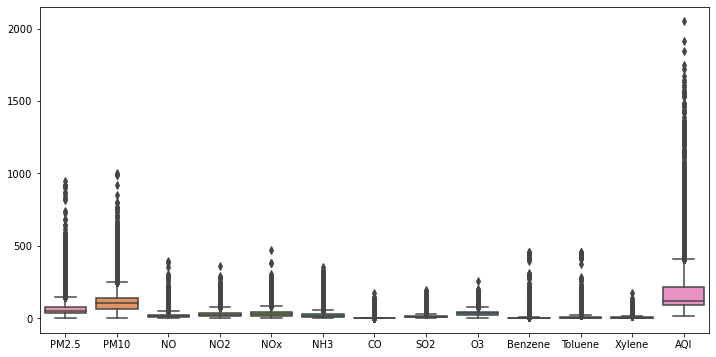

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=final_data)
plt.show()

In [66]:
final_data.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'City', 'AQI_Bucket'],
      dtype='object')

In [67]:
q1,q3=np.percentile(final_data["AQI"],[25,75])
iqr=q3-q1
upper=q3+iqr*(1.5)
lower=q1-iqr*(1.5)
final_data["AQI"]=final_data["AQI"].clip(upper=upper)

In [68]:
q1,q3=np.percentile(final_data["PM10"],[25,75])
iqr=q3-q1
upper=q3+iqr*(1.5)
lower=q1-iqr*(1.5)
final_data["PM10"]=final_data["PM10"].clip(upper=upper)

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\2446777600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["PM10"]=final_data["PM10"].clip(upper=upper)


In [69]:
q1,q3=np.percentile(final_data["PM2.5"],[25,75])
iqr=q3-q1
upper=q3+iqr*(1.5)
lower=q1-iqr*(1.5)
final_data["PM2.5"]=final_data["PM2.5"].clip(upper=upper)

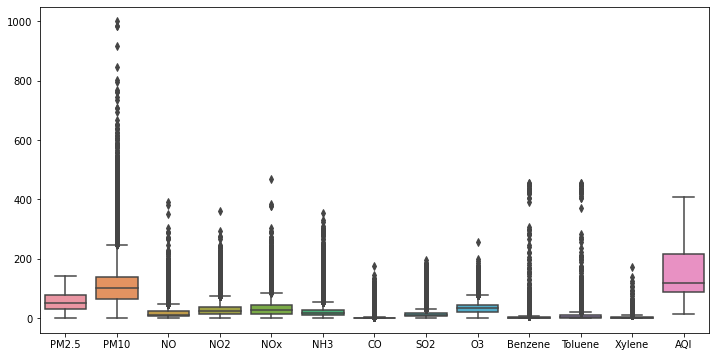

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=final_data)
plt.show()

## Detecting outliers using the Z-scores

Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.
detecting outliers with z score
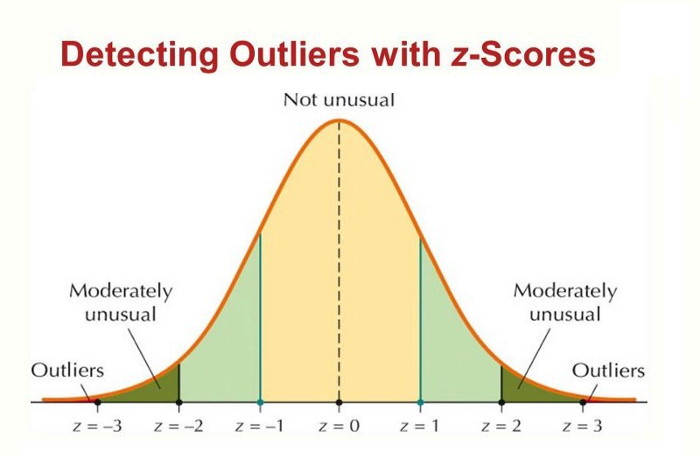
Steps:

    loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
    define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.


###
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(final_data)
print("Outliers from Z-scores method: ", sample_outliers)

## Detecting outliers using the Inter Quantile Range(IQR)

 
Detecting outliers with iqr
                                                                IQR to detect outliers

Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.
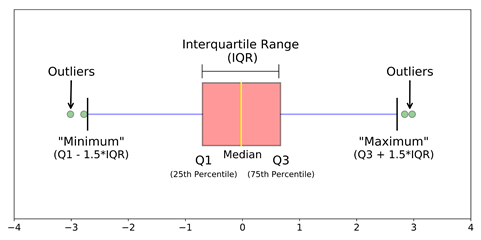
steps:

    Sort the dataset in ascending order
    calculate the 1st and 3rd quartiles(Q1, Q3)
    compute IQR=Q3-Q1
    compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
    loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers


## 
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)

## Handling Outliers

Till now we learned about detecting the outliers. The main question is WHAT do we do with the outliers?

Below are some of the methods of treating the outliers

    Trimming/removing the outlier
    Quantile based flooring and capping
    Mean/Median imputation


## Quantile based flooring and capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

Python code:

 Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("Sample:", sample)
print("New array:",b)

## Mean/Median imputation

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

Python Code:

median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
print(x.dtype)

In [71]:
final_data

PM2.5        PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      67.854497  114.584029   0.92  18.22  17.15   0.00   0.92  27.64   
1      67.854497  114.584029   0.97  15.69  16.46   0.00   0.97  24.55   
2      67.854497  114.584029  17.40  19.30  29.70   0.00  17.40  29.07   
3      67.854497  114.584029   1.70  18.48  17.97   0.00   1.70  18.59   
4      67.854497  114.584029  22.10  21.42  37.76   0.00  22.10  39.33   
...          ...         ...    ...    ...    ...    ...    ...    ...   
29526  15.020000   50.940000   7.68  25.06  19.54  12.47   0.47   8.55   
29527  24.380000   74.090000   3.42  26.06  16.53  11.99   0.52  12.72   
29528  22.910000   65.730000   3.45  29.53  18.33  10.71   0.48   8.42   
29529  16.640000   49.970000   4.05  29.26  18.80  10.03   0.52   9.84   
29530  15.000000   66.000000   0.40  26.85  14.05   5.20   0.59   2.10   

           O3   Benzene    Toluene    Xylene    AQI           City  \
0      133.36  0.000000   0.020000  0.000000  407.0      Ahmedabad   
1       34.06  3.680000   5.500000  3.770000  407.0      Ahmedabad   
2       30.70  6.800000  16.400000  2.250000  407.0      Ahmedabad   
3       36.08  4.430000  10.140000  1.000000  407.0      Ahmedabad   
4       39.31  7.010000  18.890000  2.780000  407.0      Ahmedabad   
...       ...       ...        ...       ...    ...            ...   
29526   23.30  2.240000  12.070000  0.730000   41.0  Visakhapatnam   
29527   30.14  0.740000   2.210000  0.380000   70.0  Visakhapatnam   
29528   30.96  0.010000   0.010000  0.000000   68.0  Visakhapatnam   
29529   28.30  0.000000   0.000000  0.000000   54.0  Visakhapatnam   
29530   17.05  3.891348   8.350983  2.790456   50.0  Visakhapatnam   

         AQI_Bucket  
0            Severe  
1            Severe  
2            Severe  
3            Severe  
4            Severe  
...             ...  
29526          Good  
29527  Satisfactory  
29528  Satisfactory  
29529  Satisfactory  
29530          Good  

[29531 rows x 15 columns]

In [72]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       29531 non-null  float64
 1   PM10        27522 non-null  float64
 2   NO          29531 non-null  float64
 3   NO2         29531 non-null  float64
 4   NOx         28362 non-null  float64
 5   NH3         29531 non-null  float64
 6   CO          29531 non-null  float64
 7   SO2         29531 non-null  float64
 8   O3          29369 non-null  float64
 9   Benzene     26799 non-null  float64
 10  Toluene     25521 non-null  float64
 11  Xylene      16597 non-null  float64
 12  AQI         29531 non-null  float64
 13  City        29531 non-null  object 
 14  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


In [73]:
final_data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [74]:
final_data.City.value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

<AxesSubplot:>

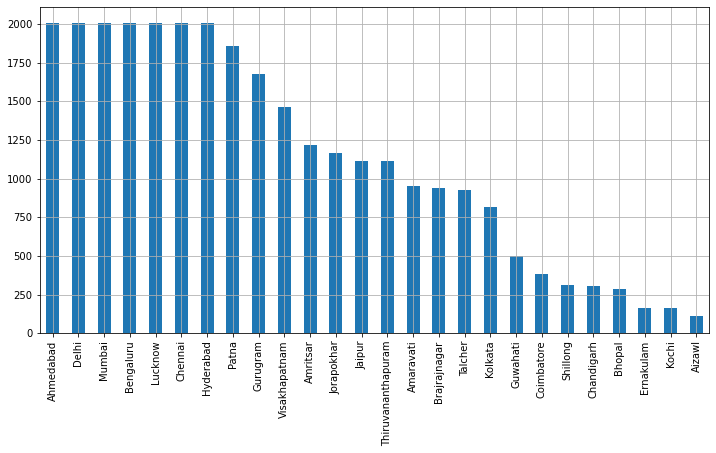

In [75]:
final_data.City.value_counts().plot(kind="bar",figsize=(12,6),grid=True)

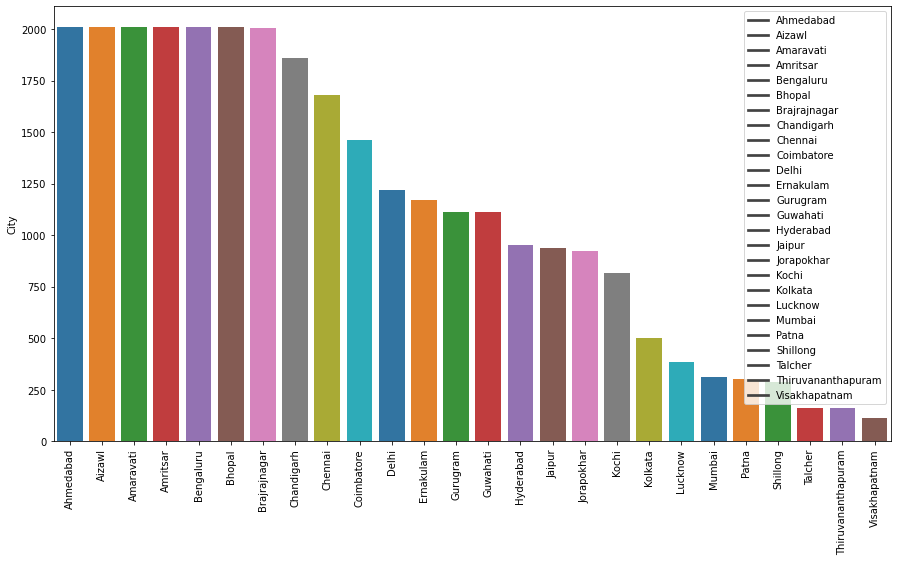

In [76]:
plt.figure(figsize=(15,8))
labels=final_data.City.unique()
sns.barplot(x=final_data.City.unique(),
           y=final_data.City.value_counts(),data=final_data,palette='tab10')
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

In [77]:
final_data.City.nunique()

26

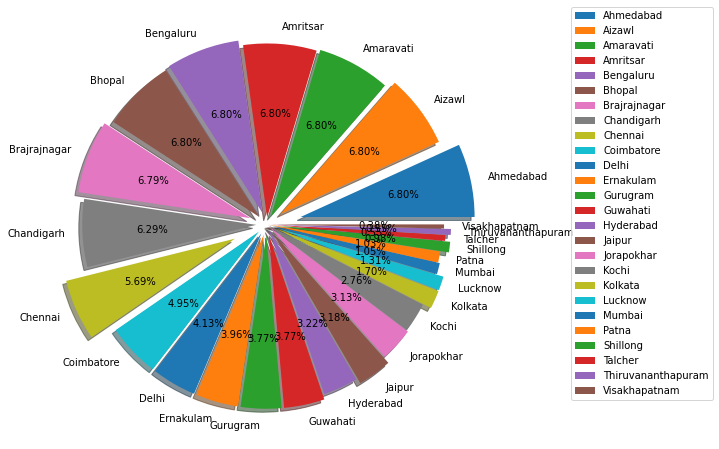

In [78]:
explode=[0.2,0.1,0.05,0.04,0.07,0.06,0.1,0.06,0.2,0.06,
         0.06,0.06,0.06,0.06,0.03,0.06,0.02,0.01,0.06,0.06,
         0.02,0.01,0.06,0.03,0.06,0.02]
plt.figure(figsize=(17,8))
plt.pie(x=final_data.City.value_counts(),explode=explode,labels=final_data.City.unique(),
        colors=None,autopct="%1.2f%%",shadow=True,wedgeprops=None,textprops=None,
    )
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
plt.show()

In [79]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
#init_notebook_mode(connected = True)

In [80]:
import plotly.graph_objs as go
label =final_data.City.unique()
val = final_data.City.value_counts()
#percent = [15.71, 15.58, 15.34, 14.72, 14.48, 13.13, 11.04]
import plotly.graph_objs as go
data1 = {
   "values": val,
   "labels": label,
   "domain": {"column": 0},
   "name":"City" ,
   "hoverinfo":"label",
   "hole": .2,
   "type": "pie"
}
data = [data1]
layout = go.Layout(
   {
      "title":"Cities",
      "grid": {"rows": 1, "columns": 1},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "City",
            "x": 0.50,
            "y": 0.5
         }]})
      


fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [81]:
final_data.AQI_Bucket.unique()

array(['Severe', 'Poor', 'Very Poor', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [82]:
final_data.AQI_Bucket.value_counts()

Moderate        10868
Satisfactory    10074
Poor             2791
Very Poor        2337
Severe           2013
Good             1448
Name: AQI_Bucket, dtype: int64

<AxesSubplot:>

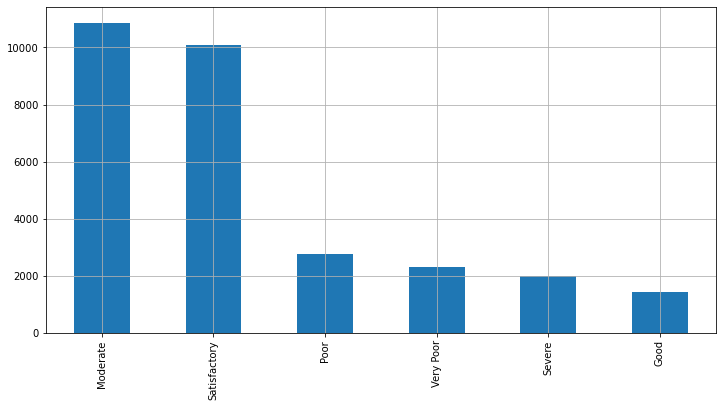

In [83]:
final_data.AQI_Bucket.value_counts().plot(kind="bar",figsize=(12,6),grid=True)

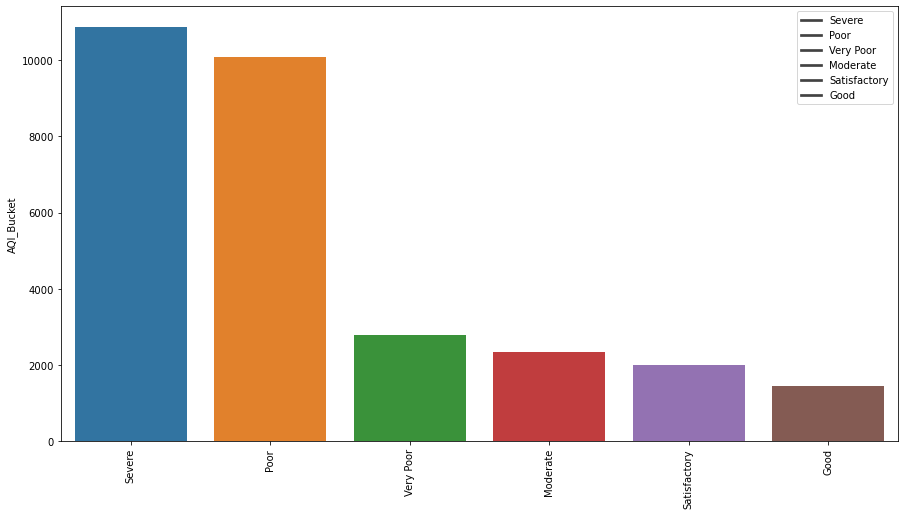

In [84]:
plt.figure(figsize=(15,8))
labels=final_data.AQI_Bucket.unique()
sns.barplot(x=final_data.AQI_Bucket.unique(),
           y=final_data.AQI_Bucket.value_counts(),data=final_data,palette='tab10')
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

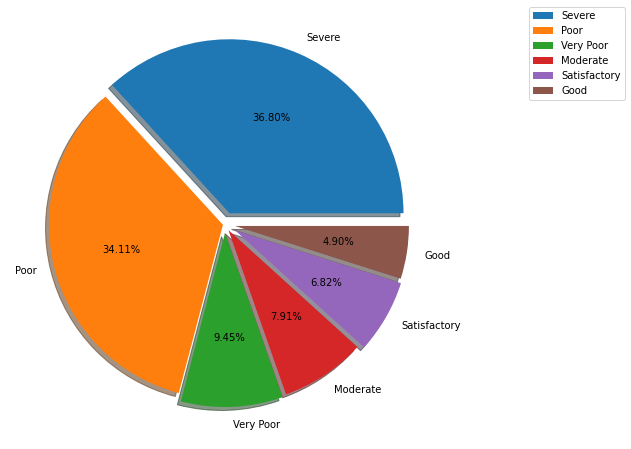

In [85]:
explode=[0.07,0.01,0.05,0.04,0.07,0.06]
plt.figure(figsize=(17,8))
plt.pie(x=final_data.AQI_Bucket.value_counts(),explode=explode,labels=final_data.AQI_Bucket.unique(),
        colors=None,autopct="%1.2f%%",shadow=True,wedgeprops=None,textprops=None,
    )
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
plt.show()

In [86]:
import plotly.graph_objs as go
label =final_data.AQI_Bucket.unique()
val = final_data.AQI_Bucket.value_counts()
#percent = [15.71, 15.58, 15.34, 14.72, 14.48, 13.13, 11.04]
import plotly.graph_objs as go
data1 = {
   "values": val,
   "labels": label,
   "domain": {"column": 0},
   "name":"AQI_Modes" ,
   "hoverinfo":"label",
   "hole": .2,
   "type": "pie"
}
data = [data1]
layout = go.Layout(
   {
      "title":"Different Types of Pollutants in the Air",
      "grid": {"rows": 1, "columns": 1},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "AQI_Modes",
            "x": 0.50,
            "y": 0.5
         }]})
      


fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [87]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [88]:
final_data.head(2)

PM2.5        PM10    NO    NO2    NOx  NH3    CO    SO2      O3  \
0  67.854497  114.584029  0.92  18.22  17.15  0.0  0.92  27.64  133.36   
1  67.854497  114.584029  0.97  15.69  16.46  0.0  0.97  24.55   34.06   

   Benzene  Toluene  Xylene    AQI       City AQI_Bucket  
0     0.00     0.02    0.00  407.0  Ahmedabad     Severe  
1     3.68     5.50    3.77  407.0  Ahmedabad     Severe

In [89]:
final_data.groupby(by="AQI_Bucket")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean')  

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\1281078882.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



PM2.5        PM10         NO        NO2        NOx  \
AQI_Bucket                                                              
Good           18.889117   40.876152   6.213306  11.989661  12.139291   
Moderate       60.307797  121.638729  15.913691  26.423136  29.710031   
Poor           94.823861  181.075740  22.913928  35.912726  44.583751   
Satisfactory   32.289529   72.273494  13.023385  20.406134  24.977585   
Severe         94.869191  176.590292  39.140348  63.690152  61.289072   
Very Poor     129.298063  227.093914  35.244876  45.905134  55.232948   

                    NH3         CO        SO2         O3   Benzene    Toluene  \
AQI_Bucket                                                                      
Good          12.090428   0.496286   7.812374  20.705256  4.809713   5.579962   
Moderate      23.276764   1.316601  14.673201  36.812673  2.574344   6.677523   
Poor          25.758880   2.259416  17.351668  41.100455  3.524734   9.971967   
Satisfactory  19.772484   0.761886  10.010654  29.227630  3.116799   4.650240   
Severe        12.391056  19.850022  46.808410  41.024969  5.427472  25.618605   
Very Poor     28.740800   3.370336  20.359954  39.165247  3.659912  13.091909   

                Xylene  
AQI_Bucket              
Good          2.016614  
Moderate      3.302533  
Poor          3.318352  
Satisfactory  1.939876  
Severe        4.552528  
Very Poor     4.654652

In [90]:
final_data.groupby(by="City")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean')  

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\1159500645.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



PM2.5        PM10         NO        NO2        NOx  \
City                                                                         
Ahmedabad           66.540378  114.584029  22.428021  59.025496  47.366898   
Aizawl              17.130000   23.352857   9.408053   0.388496  12.610354   
Amaravati           37.773217   76.362020   4.436071  22.175748  15.380413   
Amritsar            52.928857  115.202599  18.727926  18.522116  35.648294   
Bengaluru           35.540209   83.243287   9.409136  27.995042  19.717092   
Bhopal              50.059571  119.324321   7.037214  31.345321  22.428964   
Brajrajnagar        63.548385  124.217373  17.301813  16.520540  24.542647   
Chandigarh          41.091648   85.656546  10.501433  11.611067  15.058667   
Chennai             49.906494   62.834404   9.190563  16.857623  17.667942   
Coimbatore          29.151587   37.982137   7.377130  28.784533  30.887042   
Delhi               94.577877  232.809229  38.985595  50.785182  58.567023   
Ernakulam           24.944747   48.335633  23.183797   3.726168  24.287595   
Gurugram            94.620764  191.504432  17.534283  23.378166  29.377311   
Guwahati            60.023736  116.604900  20.043373  13.568743  44.305669   
Hyderabad           45.336504   91.931532   7.817194  28.386754  19.438754   
Jaipur              54.100903  123.483509  14.632987  32.418627  39.637176   
Jorapokhar          64.067740  149.657942  11.015184   9.342948        NaN   
Kochi               31.423997   67.335432  71.771625  14.945705  68.412901   
Kolkata             58.637734  115.629499  26.846916  40.396210  63.365695   
Lucknow             91.120760         NaN  15.233330  33.244403  22.525300   
Mumbai              35.198393   96.745059  31.014133  25.555212  55.038795   
Patna               98.315380  126.747958  31.842133  37.487636  45.952471   
Shillong            25.411153   42.199170   0.917092   2.750956   1.002202   
Talcher             58.678212  165.772708  30.966579  13.801024  31.895735   
Thiruvananthapuram  28.036617   52.863659   3.454977   9.380102   8.181496   
Visakhapatnam       46.822497  105.951354  12.732168  37.193188  25.235829   

                          NH3         CO        SO2         O3    Benzene  \
City                                                                        
Ahmedabad            0.000000  22.193407  55.253733  39.155408   5.413807   
Aizawl              22.308938   0.283628   7.378053   3.707692   9.809286   
Amaravati           11.988493   0.627904  14.258341  38.115100   0.546416   
Amritsar            14.375556   0.551301   8.148917  22.416148   4.182290   
Bengaluru           21.977176   1.838634   5.519021  32.868086   3.222553   
Bhopal              19.072071   0.880393  13.064821  59.851036        NaN   
Brajrajnagar        36.655871   1.798274   9.783221  16.599660   4.842562   
Chandigarh          30.777143   0.631349  10.159375  20.047204   5.065724   
Chennai             63.452612   1.067349   7.877182  32.443816   1.709205   
Coimbatore           9.582776   0.949321   8.601880  28.833473   0.009138   
Delhi               41.997150   1.976053  15.901253  51.323610   3.544480   
Ernakulam           20.635190   1.627848   3.184051        NaN   0.603671   
Gurugram            26.094454   1.257516   9.419701  34.409373   1.724171   
Guwahati            11.068104   0.735269  14.664391  25.070259   4.049495   
Hyderabad           16.206774   0.590780   9.173712  33.611005   1.173353   
Jaipur              26.513494   0.800894  11.071062  46.715469   1.571172   
Jorapokhar           7.006155   0.663049  33.645183  32.423051        NaN   
Kochi                8.014726   1.296667  17.595988   3.819691        NaN   
Kolkata             18.370381   0.799251   8.392101  30.663233  10.869815   
Lucknow             29.322199   2.130328   9.949676  36.917497   2.887419   
Mumbai              13.838278   0.568362  15.197516  33.058946   1.098605   
Patna               18.371518   1.533591  22.132505  37.249146   1.6

In [91]:
final_data.groupby(by=["AQI_Bucket","City"])["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean')  

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\887771990.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



PM2.5        PM10          NO  \
AQI_Bucket   City                                                     
Good         Ahmedabad            29.220000  114.584029    0.060000   
             Aizawl                9.944941   15.533092   11.081412   
             Amaravati            13.846560   32.260443    3.008671   
             Amritsar             30.828810   48.987959   13.629881   
             Bengaluru            23.335879   53.443123    6.195558   
             Bhopal               11.460000   29.765000    5.515000   
             Brajrajnagar         27.491087   37.542857    9.916103   
             Chandigarh           15.650208   36.023333    3.766667   
             Chennai              23.322500   58.632668    7.356667   
             Coimbatore           18.336512   26.083953    7.488461   
             Delhi                29.120293  226.703112   25.117409   
             Gurugram             33.324667  131.274438    9.962993   
             Guwahati             20.603707   37.678448    4.599052   
             Hyderabad            15.998777   40.454135    4.688369   
             Jaipur               16.567500   26.965000    6.990000   
             Jorapokhar           37.711567   35.686000    8.070000   
             Kolkata              15.161513   33.194538    5.699244   
             Lucknow              37.310541         NaN    9.527111   
             Mumbai               10.036923   31.995769   16.378846   
             Shillong             20.189609   37.452189    0.919940   
             Talcher              52.410313   14.622248   39.497826   
             Thiruvananthapuram   13.913227   33.697944    3.385436   
             Visakhapatnam        12.563646   42.127334    6.126580   
Moderate     Ahmedabad            42.727687  103.365783    6.443899   
             Amaravati            59.534292  115.164977    5.303973   
             Amritsar             57.583797  134.442211   20.317611   
             Bengaluru            47.869767  107.933966   10.693587   
             Bhopal               52.629921  130.968516    7.207017   
             Brajrajnagar         58.960162  120.209970   18.112377   
             Chandigarh           58.741094  120.257703   16.993552   
             Chennai              58.679675   62.822531    8.740835   
             Coimbatore           37.609231   48.024615    6.234615   
             Delhi                56.989576  134.037268   19.421368   
             Ernakulam            26.167959   49.840204   28.388571   
             Gurugram             80.604998  172.247688   13.798088   
             Guwahati             64.278378  125.847658   23.276577   
             Hyderabad            56.398224  112.977439    8.729096   
             Jaipur               56.119281  133.355587   14.905895   
             Jorapokhar           62.237422  136.937590   11.459869   
             Kochi                41.912432   94.319459   88.208784   
             Kolkata              65.206316  124.631711   23.400197   
             Lucknow              70.039288         NaN    8.571057   
             Mumbai               54.802515  141.919492   39.929156   
             Patna                83.391672  125.275232   27.046146   
             Shillong             64.531000   87.559000    0.866000   
             Talcher              49.818150  141.303935   30.935399   
             Thiruvananthapuram   54.683961   86.263247    3.012403   
             Visakhapatnam        51.504753  114.460051   12.942714   
Poor         Ahmedabad            58.923412  114.556587    8.844235   
             Amaravati            98.327021  163.010000    7.201702   
             Amritsar             97.593508  207.244854   21.034385   
             Bengaluru            38.788819   96.422104   12.114722   
             Bhopal               99.076774  190.005484   12.104194   
             Brajrajnagar        103.383333  187.855395   21.428234   
             Chandigarh          105.407500  168.895000   20.0

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\2858113523.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='AQI_Bucket'>

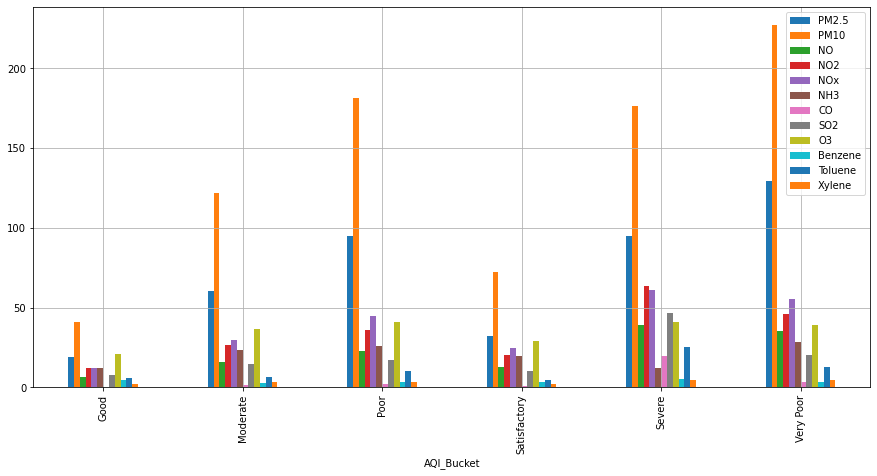

In [92]:
final_data.groupby(by="AQI_Bucket")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean').plot(
kind="bar",figsize=(15,7),grid=True)

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\33972378.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='City'>

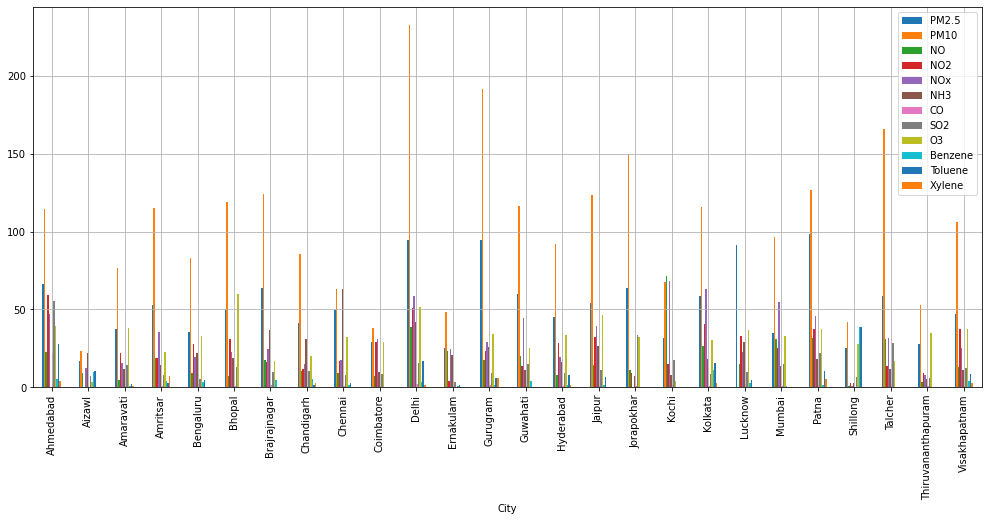

In [93]:
final_data.groupby(by="City")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean').plot(
kind="bar",grid=True,figsize=(17,7))

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\1309385333.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='City'>

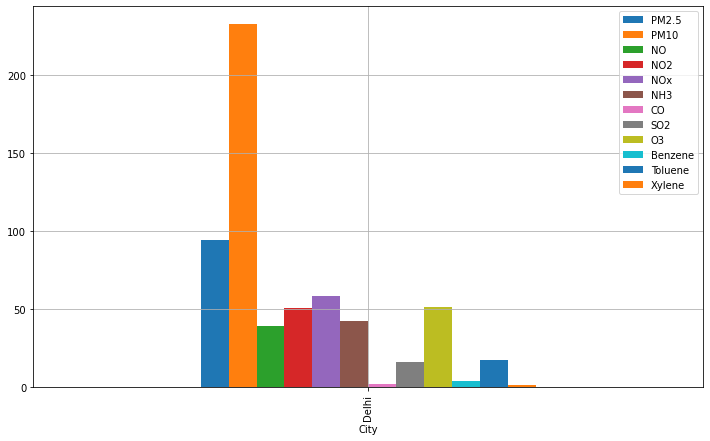

In [94]:
final_data[final_data.City=="Delhi"].groupby(by="City")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean').plot(
kind="bar",grid=True,figsize=(12,7))

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_9468\1726133821.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='City'>

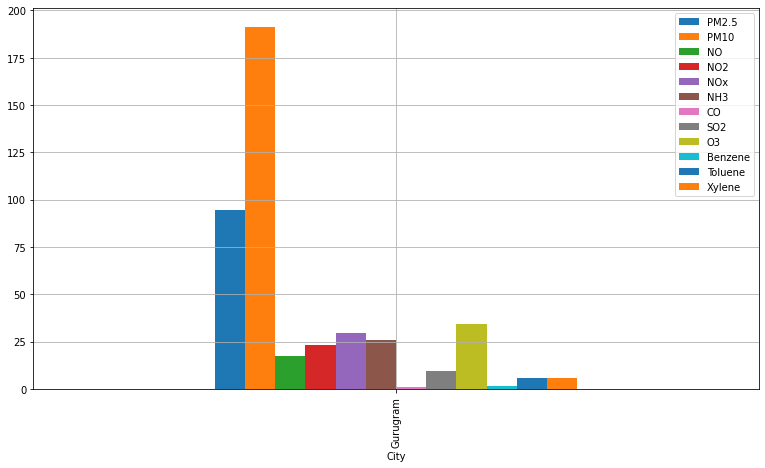

In [95]:
final_data[final_data.City=="Gurugram"].groupby(by="City")["PM2.5","PM10","NO",'NO2','NOx','NH3','CO','SO2',"O3","Benzene",'Toluene','Xylene'].agg('mean').plot(
kind="bar",grid=True,figsize=(13,7))

C:\Users\Siddhartha-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



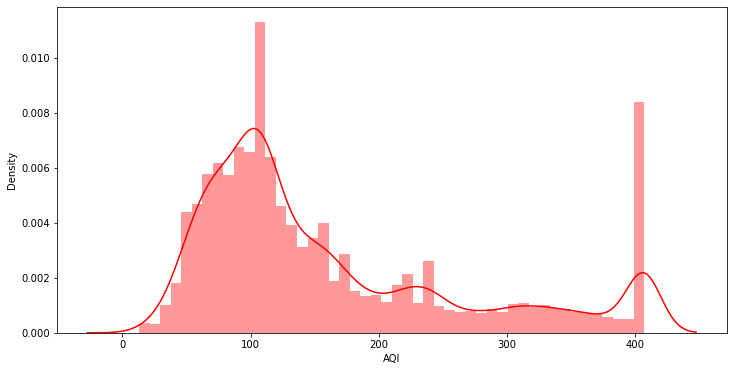

In [96]:
plt.figure(figsize=(12,6))
sns.distplot(final_data.AQI,hist=True,color="red",label="AQI")
plt.show()

In [97]:
final_data.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'City', 'AQI_Bucket'],
      dtype='object')

In [98]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

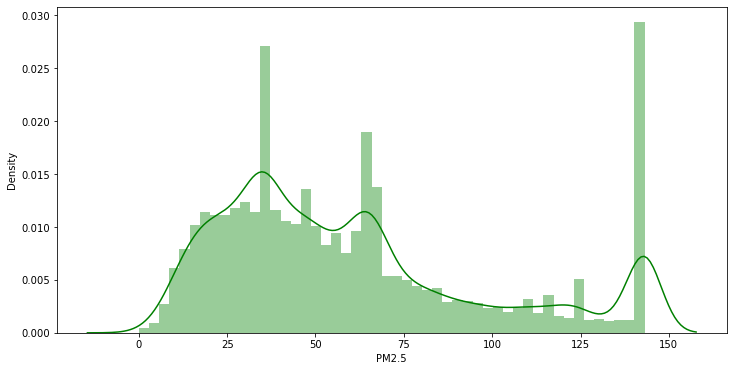

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["PM2.5"],hist=True,color="green",label="PM2.5")

<AxesSubplot:xlabel='PM10', ylabel='Density'>

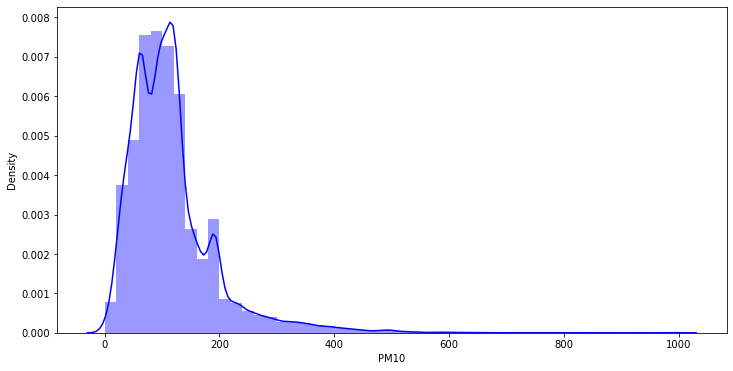

In [100]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["PM10"],hist=True,color="blue",label="PM10")


<AxesSubplot:xlabel='NO', ylabel='Density'>

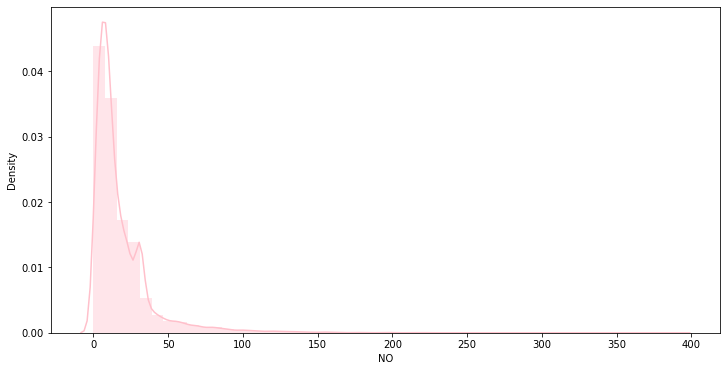

In [101]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["NO"],hist=True,color="pink",label="NO")


<AxesSubplot:xlabel='NO2', ylabel='Density'>

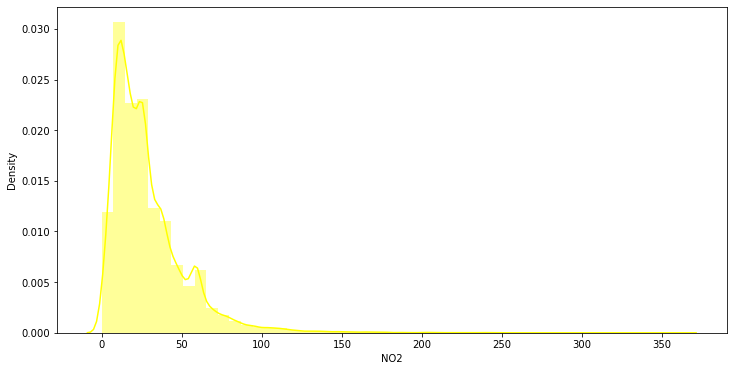

In [102]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["NO2"],hist=True,color="yellow",label="NO2")


<AxesSubplot:xlabel='NOx', ylabel='Density'>

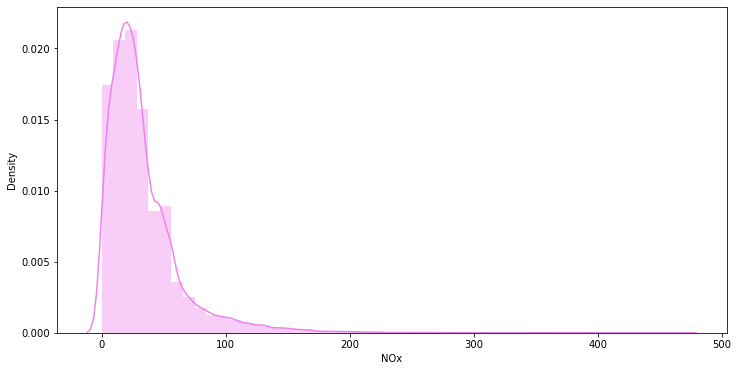

In [103]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["NOx"],hist=True,color="violet",label="NOx")


<AxesSubplot:xlabel='NH3', ylabel='Density'>

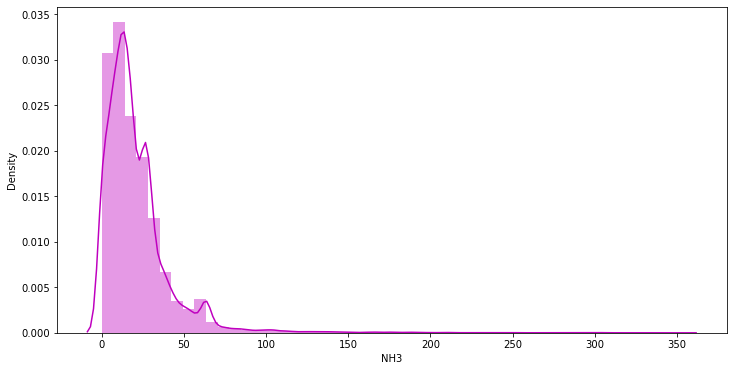

In [104]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["NH3"],hist=True,color="m",label="NH3")


<AxesSubplot:xlabel='CO', ylabel='Density'>

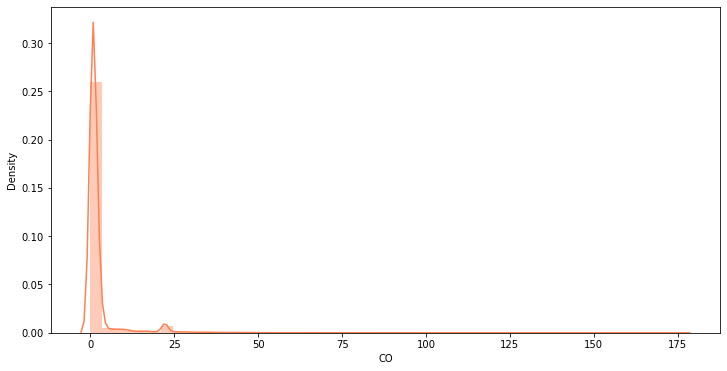

In [105]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["CO"],hist=True,color="coral",label="CO")


<AxesSubplot:xlabel='SO2', ylabel='Density'>

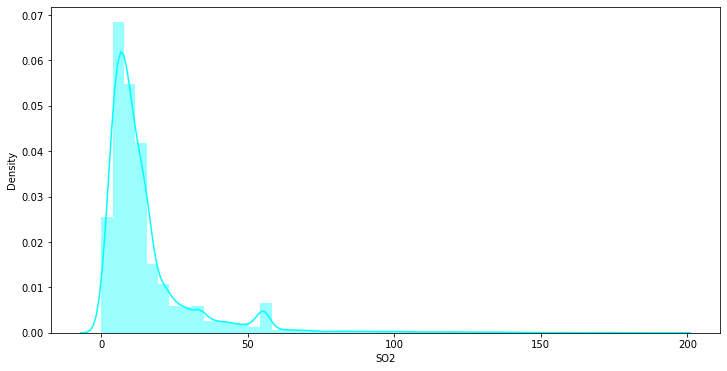

In [106]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["SO2"],hist=True,color="cyan",label="SO2")


<AxesSubplot:xlabel='O3', ylabel='Density'>

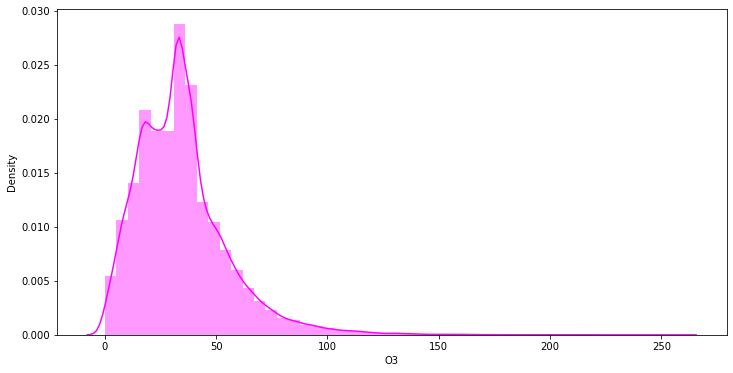

In [107]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["O3"],hist=True,color="magenta",label="O3")


<AxesSubplot:xlabel='Benzene', ylabel='Density'>

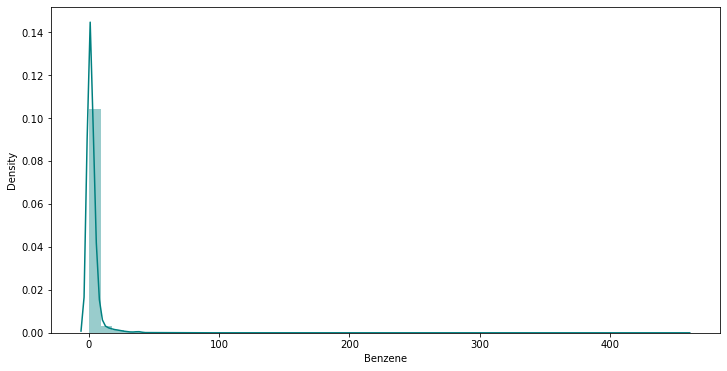

In [108]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["Benzene"],hist=True,color="teal",label="Benzene")


<AxesSubplot:xlabel='Toluene', ylabel='Density'>

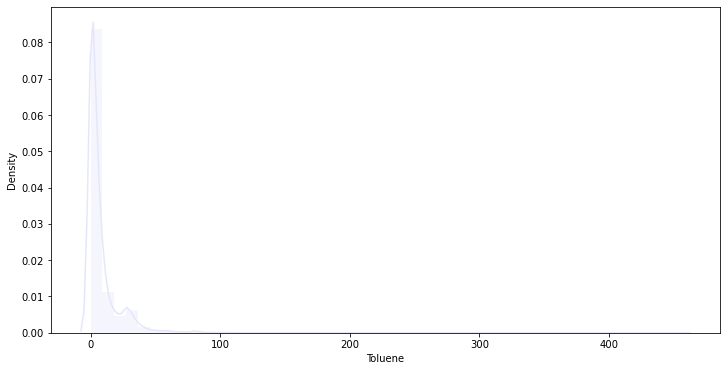

In [109]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["Toluene"],hist=True,color="lavender",label="Toluene")


<AxesSubplot:xlabel='Xylene', ylabel='Density'>

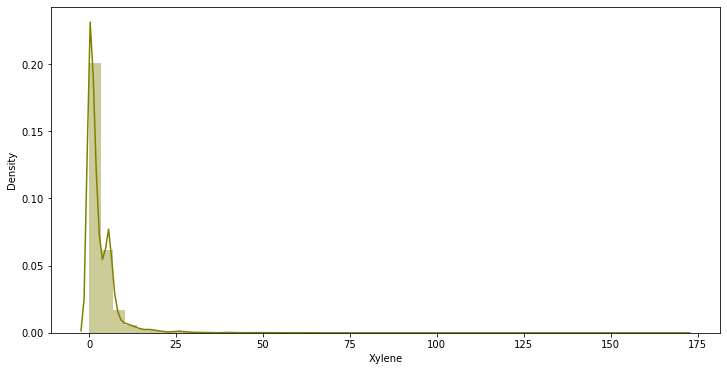

In [110]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["Xylene"],hist=True,color="olive",label="Xylene")


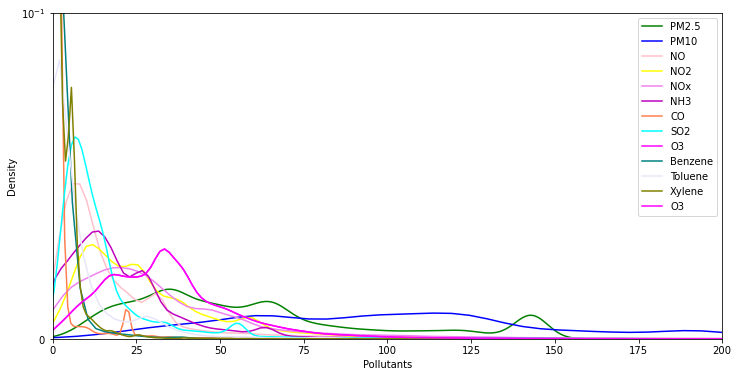

In [111]:
plt.figure(figsize=(12,6))
sns.distplot(final_data["PM2.5"],hist=False,color="green",label="PM2.5")
sns.distplot(final_data["PM10"],hist=False,color="blue",label="PM10")
sns.distplot(final_data["NO"],hist=False,color="pink",label="NO")
sns.distplot(final_data["NO2"],hist=False,color="yellow",label="NO2")
sns.distplot(final_data["NOx"],hist=False,color="violet",label="NOx")
sns.distplot(final_data["NH3"],hist=False,color="m",label="NH3")
sns.distplot(final_data["CO"],hist=False,color="coral",label="CO")
sns.distplot(final_data["SO2"],hist=False,color="cyan",label="SO2")
sns.distplot(final_data["O3"],hist=False,color="magenta",label="O3")
sns.distplot(final_data["Benzene"],hist=False,color="teal",label="Benzene")
sns.distplot(final_data["Toluene"],hist=False,color="lavender",label="Toluene")
sns.distplot(final_data["Xylene"],hist=False,color="olive",label="Xylene")
sns.distplot(final_data["O3"],hist=False,color="magenta",label="O3")
plt.ylim(0,0.10)
plt.xlim(0,200)
plt.xlabel("Pollutants")
plt.yscale("symlog")
plt.legend()
plt.show()

In [112]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [113]:
le_encoder=LabelEncoder()

In [114]:
final_data.head(7)

PM2.5        PM10      NO    NO2     NOx  NH3      CO    SO2      O3  \
0  67.854497  114.584029    0.92  18.22   17.15  0.0    0.92  27.64  133.36   
1  67.854497  114.584029    0.97  15.69   16.46  0.0    0.97  24.55   34.06   
2  67.854497  114.584029   17.40  19.30   29.70  0.0   17.40  29.07   30.70   
3  67.854497  114.584029    1.70  18.48   17.97  0.0    1.70  18.59   36.08   
4  67.854497  114.584029   22.10  21.42   37.76  0.0   22.10  39.33   39.31   
5  67.854497  114.584029   45.41  38.48   81.50  0.0   45.41  45.76   46.51   
6  67.854497  114.584029  112.16  40.62  130.77  0.0  112.16  32.28   33.47   

   Benzene  Toluene  Xylene    AQI       City AQI_Bucket  
0     0.00     0.02    0.00  407.0  Ahmedabad     Severe  
1     3.68     5.50    3.77  407.0  Ahmedabad     Severe  
2     6.80    16.40    2.25  407.0  Ahmedabad     Severe  
3     4.43    10.14    1.00  407.0  Ahmedabad     Severe  
4     7.01    18.89    2.78  407.0  Ahmedabad     Severe  
5     5.42    10.83    1.93  407.0  Ahmedabad     Severe  
6     0.00     0.00    0.00  407.0  Ahmedabad     Severe

In [115]:
#X=final_data.drop(columns=["AQI_Bucket","AQI"],axis=1)
#y=final_data["AQI"]